### **Enhanced security of Smart Homes: A Machine Learning and Deep Learning Approach**

**Research question:**
How can Machine Learning and Deep Learning algorithms be utilized to enhance the security of smart home Internet of Things (IoT) devices by effectively addressing and managing data imbalances?


#### Installing required libraries

In [ ]:
!pip install ydata-profiling
!pip install imbalanced-learn
!pip install xgboost
!pip install lightgbm
!pip install sdv
!pip install table_evaluator

#### Importing Libraries

In [ ]:
# Importing libraries
import numpy as np  # Numpy
import pandas as pd # Pandas
import matplotlib.pyplot as plt # Matplotlib
import seaborn as sns # Seaborn
import imblearn
import warnings
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,recall_score,precision_score,f1_score,roc_auc_score,accuracy_score # Importing metrics
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from google.colab import drive # Google Drive
from ydata_profiling import ProfileReport # Profile Report
from collections import Counter # Counter
from imblearn.over_sampling import SMOTE # Oversampling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.model_selection import train_test_split,KFold,cross_val_score,cross_val_predict,StratifiedKFold
warnings.filterwarnings('ignore')
from collections import Counter
from keras.callbacks import EarlyStopping
from imblearn import under_sampling
import lightgbm as lgb
from ctgan import CTGAN
from table_evaluator import load_data, TableEvaluator

#### Reading dataset

In [ ]:
# Mounting Google Drive
drive.mount('/content/drive/')
# Importing the data from csv file into dataframe
original_d = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DS2OS_mainSimulationAccessTraces.csv')
original_data = pd.DataFrame(original_d)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


#### Analyzing the dataset

In [ ]:
profile = ProfileReport(original_data, title="Pandas Profiling Report")
display(profile)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Verifying data
original_data.head(10)

sourceID          sourceAddress       sourceType   sourceLocation  \
0  lightcontrol2  /agent2/lightcontrol2  /lightControler   BedroomParents   
1  lightcontrol3  /agent3/lightcontrol3  /lightControler      Dinningroom   
2  lightcontrol1  /agent1/lightcontrol1  /lightControler  BedroomChildren   
3  lightcontrol4  /agent4/lightcontrol4  /lightControler          Kitchen   
4      movement4      /agent4/movement4  /movementSensor          Kitchen   
5        tempin2        /agent2/tempin2   /sensorService   BedroomParents   
6      movement2      /agent2/movement2  /movementSensor   BedroomParents   
7        tempin4        /agent4/tempin4   /sensorService          Kitchen   
8        tempin1        /agent1/tempin1   /sensorService  BedroomChildren   
9      movement1      /agent1/movement1  /movementSensor  BedroomChildren   

  destinationServiceAddress destinationServiceType destinationLocation  \
0     /agent2/lightcontrol2        /lightControler      BedroomParents   
1     /agent3/lightcontrol3        /lightControler         Dinningroom   
2     /agent1/lightcontrol1        /lightControler     BedroomChildren   
3     /agent4/lightcontrol4        /lightControler             Kitchen   
4         /agent4/movement4        /movementSensor             Kitchen   
5           /agent2/tempin2         /sensorService      BedroomParents   
6         /agent2/movement2        /movementSensor      BedroomParents   
7           /agent4/tempin4         /sensorService             Kitchen   
8           /agent1/tempin1         /sensorService     BedroomChildren   
9         /agent1/movement1        /movementSensor     BedroomChildren   

     accessedNodeAddress accessedNodeType        operation value  \
0  /agent2/lightcontrol2  /lightControler  registerService  none   
1  /agent3/lightcontrol3  /lightControler  registerService  none   
2  /agent1/lightcontrol1  /lightControler  registerService  none   
3  /agent4/lightcontrol4  /lightControler  registerService  none   
4      /agent4/movement4  /movementSensor  registerService  none   
5        /agent2/tempin2   /sensorService  registerService  none   
6      /agent2/movement2  /movementSensor  registerService  none   
7        /agent4/tempin4   /sensorService  registerService  none   
8        /agent1/tempin1   /sensorService  registerService  none   
9      /agent1/movement1  /movementSensor  registerService  none   

       timestamp normality  
0  1520031600000    normal  
1  1520031603269    normal  
2  1520031603279    normal  
3  1520031603290    normal  
4  1520031603464    normal  
5  1520031603464    normal  
6  1520031603474    normal  
7  1520031603474    normal  
8  1520031603484    normal  
9  1520031604212    normal

In [ ]:
# Fetching information about the dataset
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357952 entries, 0 to 357951
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sourceID                   357952 non-null  object
 1   sourceAddress              357952 non-null  object
 2   sourceType                 357952 non-null  object
 3   sourceLocation             357952 non-null  object
 4   destinationServiceAddress  357952 non-null  object
 5   destinationServiceType     357952 non-null  object
 6   destinationLocation        357952 non-null  object
 7   accessedNodeAddress        357952 non-null  object
 8   accessedNodeType           357804 non-null  object
 9   operation                  357952 non-null  object
 10  value                      355902 non-null  object
 11  timestamp                  357952 non-null  int64 
 12  normality                  357952 non-null  object
dtypes: int64(1), object(12)
memory usage: 35.5+ 

In [ ]:
# Descriptive statistics
original_data.describe()

timestamp
count  3.579520e+05
mean   1.520078e+12
std    2.465664e+07
min    1.520032e+12
25%    1.520057e+12
50%    1.520080e+12
75%    1.520099e+12
max    1.520118e+12

In [ ]:
# Getting the count of unique values in the dataset
original_data.nunique()

sourceID                         84
sourceAddress                    89
sourceType                        8
sourceLocation                   21
destinationServiceAddress        85
destinationServiceType            8
destinationLocation              21
accessedNodeAddress             170
accessedNodeType                 12
operation                         5
value                         10623
timestamp                    327811
normality                         8
dtype: int64

In [ ]:
# Checking for duplicates
original_data[original_data.duplicated() == True]

sourceID            sourceAddress       sourceType  \
28364     lightcontrol1    /agent1/lightcontrol1  /lightControler   
28365     lightcontrol1    /agent1/lightcontrol1  /lightControler   
28367     lightcontrol1    /agent1/lightcontrol1  /lightControler   
28371     lightcontrol1    /agent1/lightcontrol1  /lightControler   
28374     lightcontrol1    /agent1/lightcontrol1  /lightControler   
...                 ...                      ...              ...   
300163  heatingcontrol1  /agent3/heatingcontrol1      /thermostat   
315467   lightcontrol12  /agent12/lightcontrol12  /lightControler   
315747   lightcontrol12  /agent12/lightcontrol12  /lightControler   
339477   lightcontrol12  /agent12/lightcontrol12  /lightControler   
341724   lightcontrol12  /agent12/lightcontrol12  /lightControler   

         sourceLocation destinationServiceAddress destinationServiceType  \
28364   BedroomChildren         /agent1/movement1        /movementSensor   
28365   BedroomChildren         /agent1/movement1        /movementSensor   
28367   BedroomChildren         /agent1/movement1        /movementSensor   
28371   BedroomChildren         /agent1/movement1        /movementSensor   
28374   BedroomChildren         /agent1/movement1        /movementSensor   
...                 ...                       ...                    ...   
300163      Dinningroom           /agent6/tempin6         /sensorService   
315467         Entrance       /agent12/movement12        /movementSensor   
315747         Entrance       /agent12/movement12        /movementSensor   
339477         Entrance       /agent12/movement12        /movementSensor   
341724         Entrance       /agent12/movement12        /movementSensor   

       destinationLocation           accessedNodeAddress  accessedNodeType  \
28364      BedroomChildren    /agent1/movement1/movement  /derived/boolean   
28365      BedroomChildren    /agent1/movement1/movement  /derived/boolean   
28367      BedroomChildren    /agent1/movement1/movement  /derived/boolean   
28371      BedroomChildren    /agent1/movement1/movement  /derived/boolean   
28374      BedroomChildren    /agent1/movement1/movement  /derived/boolean   
...                    ...                           ...               ...   
300163            Bathroom               /agent6/tempin6    /sensorService   
315467            Entrance  /agent12/movement12/movement  /derived/boolean   
315747            Entrance  /agent12/movement12/movement  /derived/boolean   
339477            Entrance  /agent12/movement12/movement  /derived/boolean   
341724            Entrance  /agent12/movement12/movement  /derived/boolean   

       operation    value      timestamp             normality  
28364       read        0  1520040030059  anomalous(DoSattack)  
28365       read        0  1520040030059  anomalous(DoSattack)  
28367       read        0  1520040030060  anomalous(DoSattack)  
28371       read        0  1520040030065  anomalous(DoSattack)  
28374       read        0  1520040030069  anomalous(DoSattack)  
...          ...      ...            ...                   ...  
300163      read  19.8819  1520105325109  anomalous(DoSattack)  
315467      read        1  1520108683553                normal  
315747      read        1  1520108746211                normal  
339477      read        0  1520113947854                normal  
341724      read        1  1520114452890                normal  

[1912 rows x 13 columns]

#### Exploratory Data Analysis

In [ ]:
# Count missing values
print(original_data.isnull().sum())

sourceID                        0
sourceAddress                   0
sourceType                      0
sourceLocation                  0
destinationServiceAddress       0
destinationServiceType          0
destinationLocation             0
accessedNodeAddress             0
accessedNodeType              148
operation                       0
value                        2050
timestamp                       0
normality                       0
dtype: int64


In [ ]:
# Copying original dataset into a new dataframe to make changes
modified_dataset = original_data.copy()

#### sourceID

In [ ]:
# Getting the count of distinct values for sourceID
modified_dataset.sourceID.value_counts().count()

84

In [ ]:
modified_dataset.sourceID.value_counts()

sourceID
washingmachine1        17908
washingmachine3        17316
battery4               15023
battery5               14543
battery1               14499
                       ...  
movement1                 37
questioningservice2       18
doorlock4                 17
doorlock5                  4
doorlock3                  4
Name: count, Length: 84, dtype: int64

#### sourceAddress

In [ ]:
# Getting the count of distinct values for sourceAddress
modified_dataset.sourceAddress.value_counts().count()

89

#### sourceType

In [ ]:
# Getting the count of distinct values for sourceType
modified_dataset.sourceType.value_counts().count()

8

#### sourceLocation

In [ ]:
# Getting the count of distinct values for sourceLocation
modified_dataset.sourceLocation.value_counts()

sourceLocation
Garage             39501
Watterroom         38369
Entrance           38220
Bathroom           28461
Showerroom         28315
Kitchen            18963
Dinningroom        13430
BedroomChildren    12836
room_6             11642
Bedroom            11009
BedroomParents     10946
room_8             10798
room_9             10752
Livingroom         10621
room_2             10607
room_1             10602
room_3             10597
room_5             10596
room_4             10572
room_7             10558
room_10            10557
Name: count, dtype: int64

#### destinationServiceAddress

In [ ]:
# Getting the count of distinct values for destinationServiceAddress
modified_dataset.destinationServiceAddress.value_counts().count()

85

#### destinationServiceType

In [ ]:
# Getting the count of distinct values for destinationServiceType
modified_dataset.destinationServiceType.value_counts().count()

8

#### accessedNodeAddress

In [ ]:
# Getting the count of distinct values for accessedNodeAddress
modified_dataset.accessedNodeAddress.value_counts().count()

170

#### accessedNodeType

In [ ]:
# Getting the count of distinct values for accessedNodeType
modified_dataset.accessedNodeType.value_counts()

accessedNodeType
/sensorService      130155
/derived/boolean     94725
/basic/number        90016
/basic/text          42433
/thermostat            313
/basic/composed        100
/lightControler         23
/movementSensor         22
/batteryService          6
/doorLockService         5
/washingService          3
/smartPhone              3
Name: count, dtype: int64

In [ ]:
# Getting the count of distinct values for accessedNodeType
modified_dataset.accessedNodeType.value_counts().count()

12

In [ ]:
# Verifying NULL columns in accessedNodeType to understand the data pattern
print(modified_dataset[modified_dataset.accessedNodeType.isnull()==True])

               sourceID            sourceAddress       sourceType  \
136771  washingmachine1  /agent6/washingmachine1  /washingService   
136775  washingmachine1  /agent6/washingmachine1  /washingService   
136776  washingmachine1  /agent6/washingmachine1  /washingService   
136779  washingmachine1  /agent6/washingmachine1  /washingService   
136780  washingmachine1  /agent6/washingmachine1  /washingService   
...                 ...                      ...              ...   
137087  washingmachine1  /agent6/washingmachine1  /washingService   
137090  washingmachine1  /agent6/washingmachine1  /washingService   
137092  washingmachine1  /agent6/washingmachine1  /washingService   
137097  washingmachine1  /agent6/washingmachine1  /washingService   
137099  washingmachine1  /agent6/washingmachine1  /washingService   

       sourceLocation destinationServiceAddress destinationServiceType  \
136771       Bathroom          /agent5/battery2        /batteryService   
136775       Bathroom  

In [ ]:
# As per the data trend, NULL columns can be replaced with /basic/text
modified_dataset.fillna({'accessedNodeType': '/basic/text'},inplace=True)

#### operation

<Axes: xlabel='operation'>

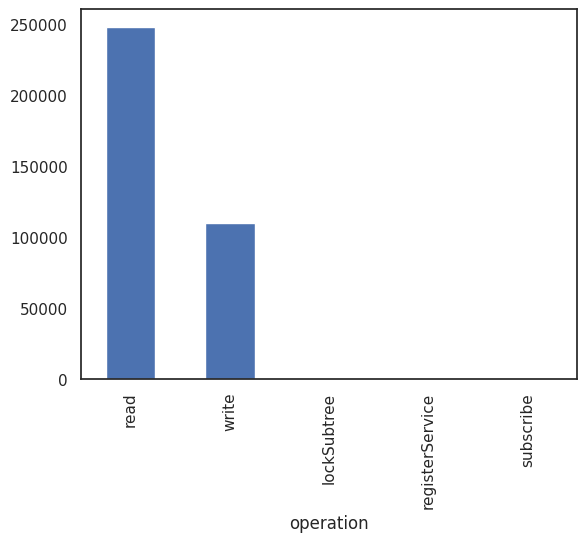

In [ ]:
# Getting the count of distinct values for operation
modified_dataset.operation.value_counts().plot(kind='bar')

#### value

In [ ]:
print(modified_dataset.value.value_counts())

value
1                    57047
0                    50282
false                25966
true                 14460
10                    9635
                     ...  
1.521218583191E12        1
1.521218587789E12        1
1.521218596114E12        1
1.521218597275E12        1
1.521219303618E12        1
Name: count, Length: 10623, dtype: int64


In [ ]:
# twenty is replaced with 20
modified_dataset['value'].replace(to_replace = 'twenty', value = '20',inplace=True)

# false is replaced with 0
modified_dataset['value'].replace(to_replace = 'false', value = '0',inplace=True)

# true is replaced with 1
modified_dataset['value'].replace(to_replace = 'true', value = '1',inplace=True)

# none is replaced with NaN
modified_dataset['value'].replace(to_replace = 'none', value = np.NaN,inplace=True)

# org. values are replaced with NaN
modified_dataset['value'].replace(to_replace = 'org.ds2os.vsl.core.utils.AddressParameters@463d9146', value = np.NaN,inplace=True)
modified_dataset['value'].replace(to_replace = 'org.ds2os.vsl.core.utils.AddressParameters@699d52f5', value = np.NaN,inplace=True)
modified_dataset['value'].replace(to_replace = 'org.ds2os.vsl.core.utils.AddressParameters@273343f8', value = np.NaN,inplace=True)
modified_dataset['value'].replace(to_replace = 'org.ds2os.vsl.core.utils.AddressParameters@181ae4a8', value = np.NaN,inplace=True)
modified_dataset['value'].replace(to_replace = 'org.ds2os.vsl.core.utils.AddressParameters@5c494e7d', value = np.NaN,inplace=True)
modified_dataset['value'].replace(to_replace = 'org.ds2os.vsl.core.utils.AddressParameters@6876d7bb', value = np.NaN,inplace=True)
modified_dataset['value'].replace(to_replace = 'org.ds2os.vsl.core.utils.AddressParameters@4ff97c45', value = np.NaN,inplace=True)
modified_dataset['value'].replace(to_replace = 'org.ds2os.vsl.core.utils.AddressParameters@3ebb34ed', value = np.NaN,inplace=True)
modified_dataset['value'].replace(to_replace = 'org.ds2os.vsl.core.utils.AddressParameters@2c82b391', value = np.NaN,inplace=True)
modified_dataset['value'].replace(to_replace = 'org.ds2os.vsl.core.utils.AddressParameters@61ba9b2b', value = np.NaN,inplace=True)
modified_dataset['value'].replace(to_replace = 'org.ds2os.vsl.core.utils.AddressParameters@715cced', value = np.NaN,inplace=True)

In [ ]:
# Converting 'value' column from object to numeric
modified_dataset['value'] = pd.to_numeric(modified_dataset['value'],errors = 'coerce')

In [ ]:
# Replacing NaNs in value with Mean
modified_dataset['value'] = modified_dataset['value'].replace(np.NaN, modified_dataset['value'].mean())

#### timestamp

In [ ]:
# As timestamp is a discrete variable, it can be dropped from the dataset
modified_dataset = modified_dataset.drop(['timestamp'], axis=1)

#### normality

In [ ]:
# Printing record counts for various classes in target feature (normality)
print(modified_dataset.normality.value_counts())

normality
normal                           347935
anomalous(DoSattack)               5780
anomalous(scan)                    1547
anomalous(malitiousControl)         889
anomalous(malitiousOperation)       805
anomalous(spying)                   532
anomalous(dataProbing)              342
anomalous(wrongSetUp)               122
Name: count, dtype: int64


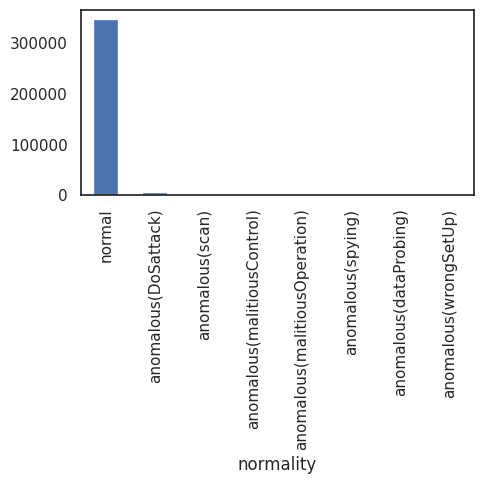

In [ ]:
# Plotting bar plot for various classes in target feature
fig, ax = plt.subplots(figsize=(5, 5))
modified_dataset.normality.value_counts().plot(kind='bar')
plt.tight_layout()

In [ ]:
# Printing percentages of classes in target feature
print('Percentages - ',modified_dataset.normality.value_counts()/modified_dataset.normality.count() * 100)

Percentages -  normality
normal                           97.201580
anomalous(DoSattack)              1.614742
anomalous(scan)                   0.432181
anomalous(malitiousControl)       0.248357
anomalous(malitiousOperation)     0.224890
anomalous(spying)                 0.148623
anomalous(dataProbing)            0.095544
anomalous(wrongSetUp)             0.034083
Name: count, dtype: float64


In [ ]:
# Replace categories with numbers
modified_dataset['normality'].replace(to_replace='normal',value=0,inplace=True)
modified_dataset['normality'].replace(to_replace='anomalous(DoSattack)',value=1,inplace=True)
modified_dataset['normality'].replace(to_replace='anomalous(scan)',value=2,inplace=True)
modified_dataset['normality'].replace(to_replace='anomalous(malitiousControl)',value=3,inplace=True)
modified_dataset['normality'].replace(to_replace='anomalous(malitiousOperation)',value=4,inplace=True)
modified_dataset['normality'].replace(to_replace='anomalous(spying)',value=5,inplace=True)
modified_dataset['normality'].replace(to_replace='anomalous(dataProbing)',value=6,inplace=True)
modified_dataset['normality'].replace(to_replace='anomalous(wrongSetUp)',value=7,inplace=True)

#### Vectorization using Label Encoder

In [ ]:
# Converting categories into numbers using Label Encoder
le = LabelEncoder()
col_obj = modified_dataset.columns
for col in col_obj:
    if col != 'normality':
        modified_dataset[col] = le.fit_transform(modified_dataset[col])

#### Heatmap and correlation analysis

In [ ]:
# Correlation between features
modified_dataset.corr()

sourceID  sourceAddress  sourceType  \
sourceID                   1.000000       0.149403    0.893603   
sourceAddress              0.149403       1.000000    0.046139   
sourceType                 0.893603       0.046139    1.000000   
sourceLocation             0.083993      -0.024445   -0.014879   
destinationServiceAddress  0.075887       0.986339   -0.030628   
destinationServiceType     0.216636       0.018065    0.119050   
destinationLocation        0.115462       0.077475    0.022244   
accessedNodeAddress        0.073186       0.985857   -0.031908   
accessedNodeType           0.328142       0.054746    0.161382   
operation                  0.565008       0.042069    0.336194   
value                      0.309523       0.039059    0.194960   
normality                 -0.004238      -0.042566    0.082411   

                           sourceLocation  destinationServiceAddress  \
sourceID                         0.083993                   0.075887   
sourceAddress                   -0.024445                   0.986339   
sourceType                      -0.014879                  -0.030628   
sourceLocation                   1.000000                  -0.004447   
destinationServiceAddress       -0.004447                   1.000000   
destinationServiceType           0.304117                   0.095871   
destinationLocation              0.950528                   0.095956   
accessedNodeAddress             -0.008461                   0.999852   
accessedNodeType                 0.284308                   0.115741   
operation                        0.087201                   0.032115   
value                            0.159786                   0.078094   
normality                       -0.032048                  -0.041910   

                           destinationServiceType  destinationLocation  \
sourceID                                 0.216636             0.115462   
sourceAddress                            0.018065             0.077475   
sourceType                               0.119050             0.022244   
sourceLocation                           0.304117             0.950528   
destinationServiceAddress                0.095871             0.095956   
destinationServiceType                   1.000000             0.298070   
destinationLocation                      0.298070             1.000000   
accessedNodeAddress                      0.098850             0.092020   
accessedNodeType                         0.902054             0.266707   
operation                                0.309490             0.089776   
value                                    0.609438             0.163124   
normality                                0.045216            -0.029780   

                           accessedNodeAddress  accessedNodeType  operation  \
sourceID                              0.073186          0.328142   0.565008   
sourceAddress                         0.985857          0.054746   0.042069   
sourceType                           -0.031908          0.161382   0.336194   
sourceLocation                       -0.008461          0.284308   0.087201   
destinationServiceAddress             0.999852          0.115741   0.032115   
destinationServiceType                0.098850          0.902054   0.309490   
destinationLocation                   0.092020          0.266707   0.089776   
accessedNodeAddress                   1.000000          0.115866   0.028031   
accessedNodeType                      0.115866          1.000000   0.450295   
operation                             0.028031          0.450295   1.000000   
value                                 0.074753          0.703585   0.434172   
normality                            -0.041075         -0.016302   0.014913   

                              value  normality  
sourceID                   0.309523  -0.004238  
sourceAddress              0.039059  -0.042566  
sourceType                 0.194960   0.082411  
sourceLocation             0.159786  -0.0320

In [ ]:
# Copying into a new dataframe for visualization
modified_dataset1 = modified_dataset.copy()

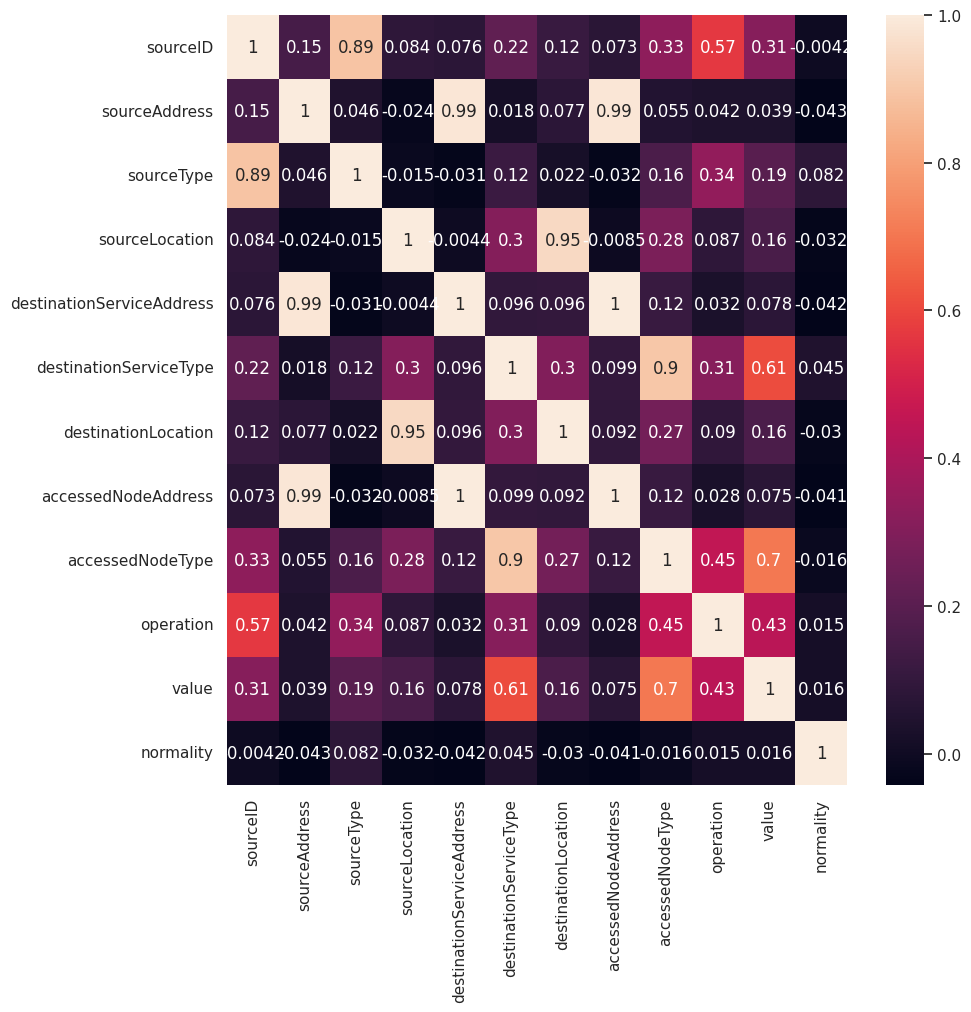

In [ ]:
# Plotting heatmap
plt.figure(figsize=(10,10))
g=sns.heatmap(modified_dataset.corr(),annot=True)

In [ ]:
# Dropping highly correlated features
modified_dataset = modified_dataset.drop(['sourceType'
                                         ,'sourceAddress'
                                         ,'destinationServiceType'
                                         ,'destinationServiceAddress'
                                         ,'destinationLocation'
                                         ]
                                        , axis=1)

Text(0.5, 1.0, 'Heatmap after dropping collinear features')

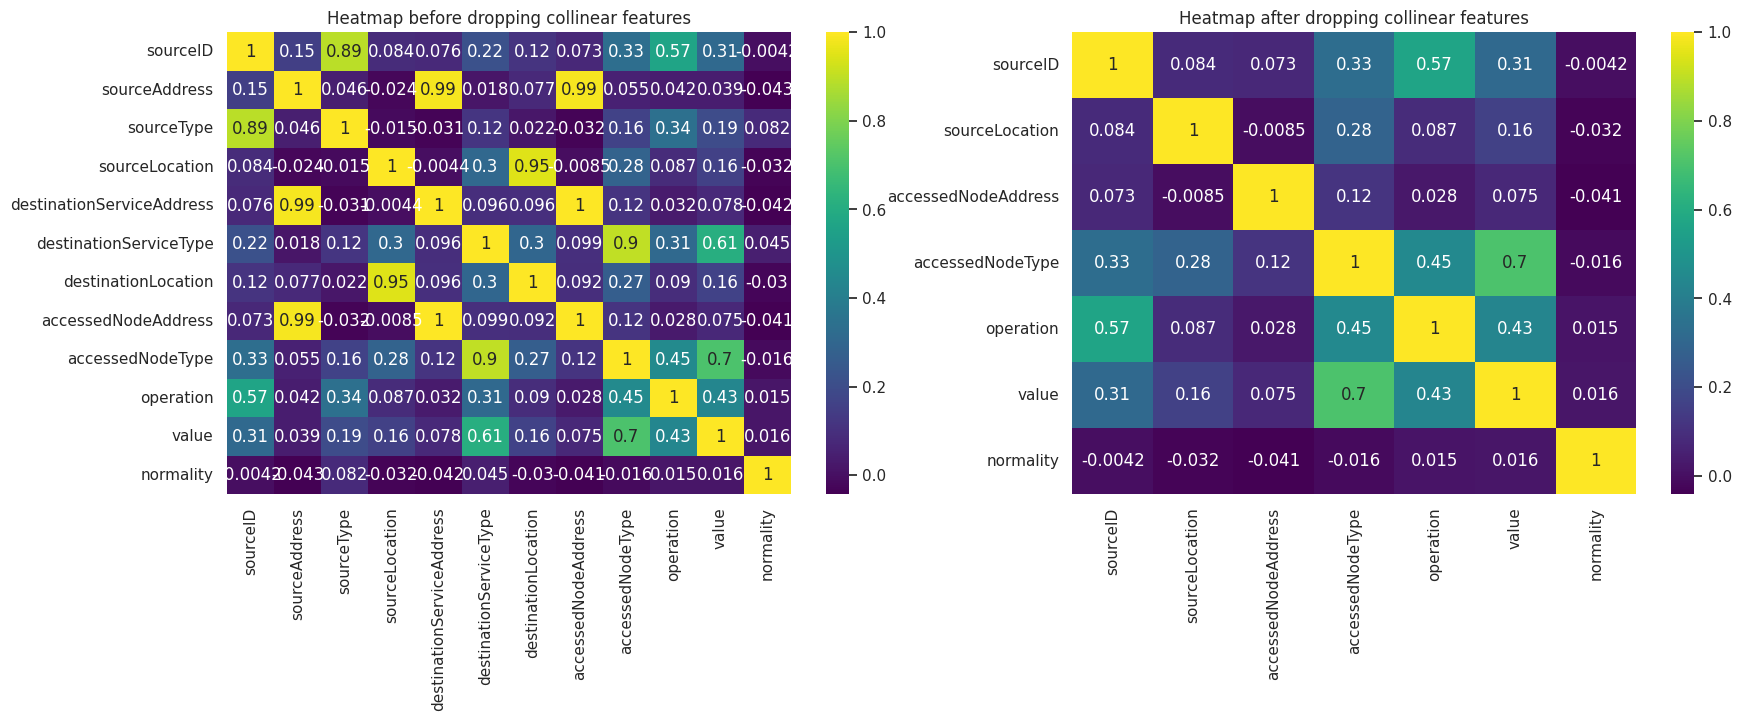

In [ ]:
# Plotting heatmaps to visualize the data before and after dropping collinear features
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
sns.heatmap(modified_dataset1.corr(), annot=True, ax=ax[0], cmap="viridis")
sns.heatmap(modified_dataset.corr(), annot=True, ax=ax[1], cmap="viridis")
ax[0].set_title("Heatmap before dropping collinear features")
ax[1].set_title("Heatmap after dropping collinear features")

In [ ]:
# Defining a variable to hold random state
rand_state = 7

#### Defining a function for LSTM algorithm

In [ ]:
def call_LSTM(X_data,y_data,epochs):

  # Encode target labels as integers
  label_encoder = LabelEncoder()
  y_encoded = label_encoder.fit_transform(y_data)

  # One-hot encode the target labels for neural network
  y_onehot = to_categorical(y_encoded)

  scaler=StandardScaler() # Scaling data
  scaled_x = scaler.fit_transform(X_data)

  # Split into training and test sets
  X_train, X_test, y_train, y_test = train_test_split(scaled_x, y_onehot, test_size=0.3, random_state=rand_state)

  X_train, X_test, y_train, y_test = np.array(X_train),np.array(X_test), np.array(y_train), np.array(y_test)

  X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
  X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

  # The LSTM architecture
  lstm_classifier = Sequential()
  # First LSTM layer with Dropout regularisation
  lstm_classifier.add(LSTM(units=50, return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2])))
  lstm_classifier.add(Dropout(0.2))
  # Second LSTM layer
  lstm_classifier.add(LSTM(units=50, return_sequences=True))
  lstm_classifier.add(Dropout(0.2))
  # Third LSTM layer
  lstm_classifier.add(LSTM(units=50, return_sequences=True))
  lstm_classifier.add(Dropout(0.2))
  # Fourth LSTM layer
  lstm_classifier.add(LSTM(units=50))
  lstm_classifier.add(Dropout(0.2))
  # The output layer
  lstm_classifier.add(Dense(y_onehot.shape[1], activation='softmax'))

  # Compiling the RNN
  lstm_classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  # Defining EarlyStopping criteria to avoid overfitting
  es = EarlyStopping(monitor='val_loss', patience=3)

  lstm_classifier.summary()

  # Fitting to the training set
  lstm_classifier.fit(X_train,y_train,epochs=epochs,batch_size=100,validation_split=0.2,callbacks=[es])
  #validation_data=(X_test,y_test)

  # Making the predictions and evaluating the model
  y_pred = lstm_classifier.predict(X_test)

  # Evaluate the model
  loss, test_accuracy = lstm_classifier.evaluate(X_test,y_test)

  train_loss, train_accuracy = lstm_classifier.evaluate(X_train,y_train)

  y_pred_classes = np.argmax(y_pred, axis=1)
  y_test_classes = np.argmax(y_test, axis=1)

  # Decode the predicted and true labels back to original string labels for the report
  y_pred_labels = label_encoder.inverse_transform(y_pred_classes)
  y_test_labels = label_encoder.inverse_transform(y_test_classes)

  # Printing Confusion Matrix
  print('Confusion Matrix ')
  fig, ax = plt.subplots(figsize=(9,9))
  sns.heatmap(confusion_matrix(y_test_labels, y_pred_labels),annot=True,fmt='2g')
  all_sample_title = 'Accuracy Score: {0}'.format(round(test_accuracy,3))
  plt.title(all_sample_title, size = 10);
  plt.show()

  # Printing Confusion Matrix
  print(confusion_matrix(y_test_labels, y_pred_labels))

  # Print classification report
  print("LSTM Classification Report:")
  print(classification_report(y_test_labels, y_pred_labels))

  return train_accuracy,test_accuracy,y_test_labels,y_pred_labels

#### Defining a function for Neural Network

In [ ]:
def call_neural_network(X_data,y_data,epochs):

  # Encode target labels as integers
  label_encoder = LabelEncoder()
  y_encoded = label_encoder.fit_transform(y_data)

  # One-hot encode the target labels for neural network
  y_onehot = to_categorical(y_encoded)

  # Split into training and test sets
  X_train, X_test, y_train, y_test = train_test_split(X_data, y_onehot, test_size=0.3, random_state=rand_state)

  scaler=StandardScaler() # Scaling data
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)

  # Build the neural network
  model = Sequential()
  model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(y_onehot.shape[1], activation='softmax'))

  # Compile the model
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  # Defining EarlyStopping criteria to avoid overfitting
  es = EarlyStopping(monitor='val_loss', patience=3)

  model.summary()

  # Train the model
  model.fit(X_train, y_train, epochs=epochs, batch_size=100, validation_split=0.2,callbacks=[es])

  # Evaluate the model
  loss, test_accuracy = model.evaluate(X_test,y_test)

  train_loss, train_accuracy = model.evaluate(X_train,y_train)

  # Make predictions
  y_pred = model.predict(X_test)
  y_pred_classes = np.argmax(y_pred, axis=1)
  y_test_classes = np.argmax(y_test, axis=1)

  # Decode the predicted and true labels back to original string labels for the report
  y_pred_labels = label_encoder.inverse_transform(y_pred_classes)
  y_test_labels = label_encoder.inverse_transform(y_test_classes)

  # Printing Confusion Matrix
  print('Confusion Matrix ')
  fig, ax = plt.subplots(figsize=(9,9))
  sns.heatmap(confusion_matrix(y_test_labels, y_pred_labels),annot=True,fmt='2g')
  all_sample_title = 'Accuracy Score: {0}'.format(round(test_accuracy,3))
  plt.title(all_sample_title, size = 10);
  plt.show()

  # Printing Confusion Matrix
  print(confusion_matrix(y_test_labels, y_pred_labels))

  # Print classification report
  print("Neural Network Classification Report:")
  print(classification_report(y_test_labels, y_pred_labels))

  return train_accuracy,test_accuracy,y_test_labels,y_pred_labels

#### Machine Learning algorithms

In [ ]:
algorithms = {'Random Forest Classifier':RandomForestClassifier() # Ensemble Based-Bagging
             ,'Decision Tree Classifier':DecisionTreeClassifier(criterion = 'gini', random_state=rand_state,max_depth=100) # Tree Based
             ,'MLP - Neural Network': MLPClassifier()
             ,'XGBoost' : XGBClassifier()
             #,'LightGBM' : lgb.LGBMClassifier(boosting_type='gbdt',verbose=-1)
             }

In [ ]:
# Standard Scaler
scaler = StandardScaler()

In [ ]:
# Defining a global dataframe to hold results
global results_d

#### Defining a function to call Machine Learning and Deep Learning algorithms

In [ ]:
# Function to call algorithms
def call_algorithm(X_data,y_data,run_type,epochs):

  # Splitting data into 70:30 ratio
  X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,test_size= 0.3,random_state=rand_state,stratify=y_data,shuffle=True)

  # Defining a dataframe to store results
  results_d = pd.DataFrame()

  # Looping through algorithms
  for name, algorithm in algorithms.items():
    print('****************',name,'******************')

    train_accuracy_scores = []
    test_accuracy_scores = []
    test_recall_scores = []
    test_precision_scores = []
    test_f1_scores = []

    # Scaling the data
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    # Defining the criteria for Cross-validation using StratifiedKFold
    cvn = StratifiedKFold(n_splits=10, random_state=rand_state,shuffle=True)  # Stratified K Fold

    # Getting scores from Cross-validation
    score = cross_val_score(algorithm, X_train, y_train, scoring='accuracy', cv=cvn, n_jobs=-1)

    # Predicting on test data
    y_pred = cross_val_predict(algorithm, X_test, y_test, cv=cvn)

    # Calculating accuracy on test set
    accuracy = accuracy_score(y_test,y_pred)

    rfmean = np.mean(score)

    # Printing Confusion Matrix
    print('Confusion Matrix ')
    fig, ax = plt.subplots(figsize=(9,9))
    sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt='2g')
    all_sample_title = 'Accuracy Score: {0}'.format(round(accuracy,3))
    plt.title(all_sample_title, size = 10);
    plt.show()

    # Printing Confusion Matrix
    print(confusion_matrix(y_test, y_pred))

    # Printing Classification Report
    print(classification_report(y_test, y_pred))

    train_accuracy_scores.append(rfmean)
    test_accuracy_scores.append(accuracy)
    test_recall_scores.append(recall_score(y_test,y_pred,average='macro'))
    test_precision_scores.append(precision_score(y_test,y_pred,average='macro'))
    test_f1_scores.append(f1_score(y_test,y_pred,average='macro'))

    # Creating a temporary dataframe to hold results
    temp_line = pd.DataFrame({"Run Type":[run_type]
                                ,"Algorithm":[name]
                                ,"Training Accuracy":[np.mean(train_accuracy_scores)]
                                ,"Testing Accuracy":[np.mean(test_accuracy_scores)]
                                ,"Recall Score":[np.mean(test_recall_scores)]
                                ,"Precision Score":[np.mean(test_precision_scores)]
                                ,"F1 Score":[np.mean(test_f1_scores)]
                                })

    # Appending results to final dataframe
    results_d = pd.concat([results_d,temp_line],ignore_index = True)

  # Calling Neural Network
  nn_train_accuracy,nn_test_accuracy,nn_y_test_labels,nn_y_pred_labels = call_neural_network(X_data,y_data,epochs)

  # Creating a temporary dataframe to hold results
  temp_line_nn = pd.DataFrame({"Run Type":[run_type]
                               ,"Algorithm":['Neural Network']
                               ,"Training Accuracy":[nn_train_accuracy]
                               ,"Testing Accuracy":[nn_test_accuracy]
                               ,"Recall Score":[recall_score(nn_y_test_labels,nn_y_pred_labels,average='macro')]
                               ,"Precision Score":[precision_score(nn_y_test_labels,nn_y_pred_labels,average='macro')]
                               ,"F1 Score":[f1_score(nn_y_test_labels,nn_y_pred_labels,average='macro')]
                               })

  # Appending results to final dataframe
  results_d = pd.concat([results_d,temp_line_nn],ignore_index = True)

  # Calling LSTM
  lstm_train_accuracy,lstm_test_accuracy,lstm_y_test_labels,lstm_y_pred_labels = call_LSTM(X_data,y_data,epochs)

  # Creating a temporary dataframe to hold results
  temp_line_lstm = pd.DataFrame({"Run Type":[run_type]
                               ,"Algorithm":['LSTM - RNN']
                               ,"Training Accuracy":[lstm_train_accuracy]
                               ,"Testing Accuracy":[lstm_test_accuracy]
                               ,"Recall Score":[recall_score(lstm_y_test_labels,lstm_y_pred_labels,average='macro')]
                               ,"Precision Score":[precision_score(lstm_y_test_labels,lstm_y_pred_labels,average='macro')]
                               ,"F1 Score":[f1_score(lstm_y_test_labels,lstm_y_pred_labels,average='macro')]
                               })

  # Appending results to final dataframe
  results_d = pd.concat([results_d,temp_line_lstm],ignore_index = True)

  return results_d

#### Oversampling - SMOTE

Class=0, n=347935 (12.500%)
Class=2, n=347935 (12.500%)
Class=4, n=347935 (12.500%)
Class=1, n=347935 (12.500%)
Class=5, n=347935 (12.500%)
Class=6, n=347935 (12.500%)
Class=7, n=347935 (12.500%)
Class=3, n=347935 (12.500%)


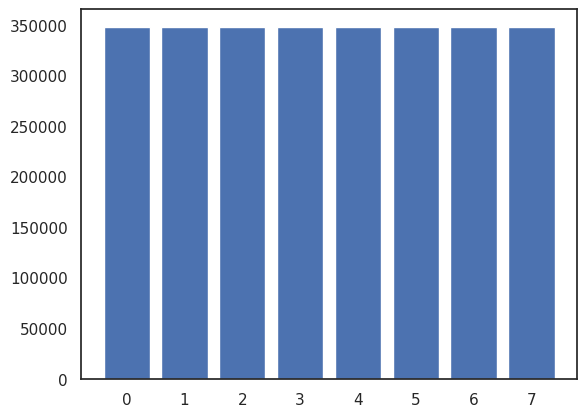

In [ ]:
# Copying the data into a dataframe
smote_df = modified_dataset.copy()

X = smote_df.drop('normality',axis=1)
Y = smote_df['normality']

oversample = SMOTE(random_state=rand_state)

# Oversampling the data
X_smote, Y_smote = oversample.fit_resample(X, Y)

# Analyzing the count of records generated by SMOTE
counter = Counter(Y_smote)
for k,v in counter.items():
  per = v / len(Y_smote) * 100
  print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

# Plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

Text(0.5, 1.0, 'Synthetic Data - SMOTE')

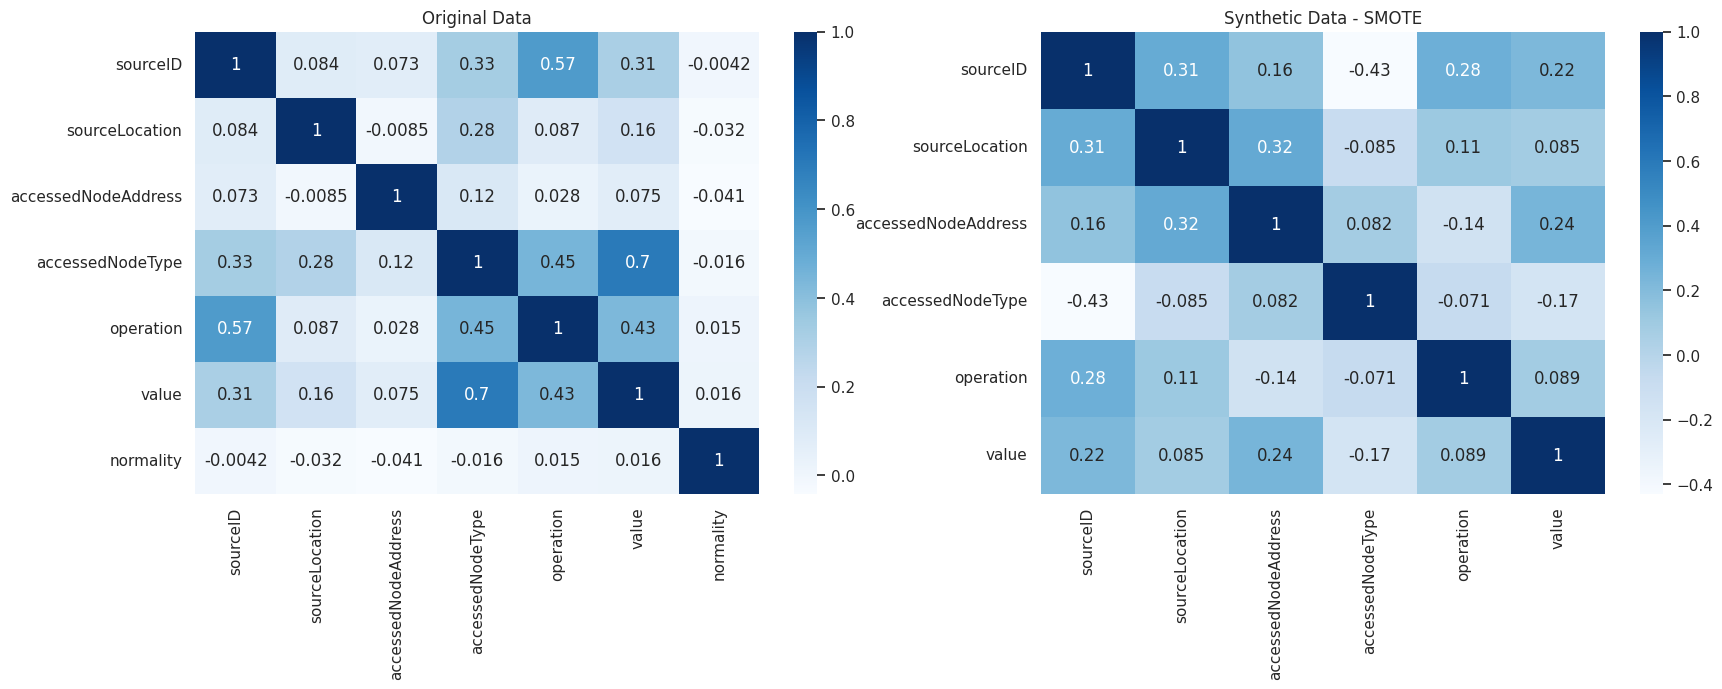

In [ ]:
# Plotting heatmaps to view the original data and synthetic data generated by SMOTE
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
sns.heatmap(modified_dataset.corr(), annot=True, ax=ax[0], cmap="Blues")
sns.heatmap(X_smote.corr(), annot=True, ax=ax[1], cmap="Blues")
ax[0].set_title("Original Data")
ax[1].set_title("Synthetic Data - SMOTE")

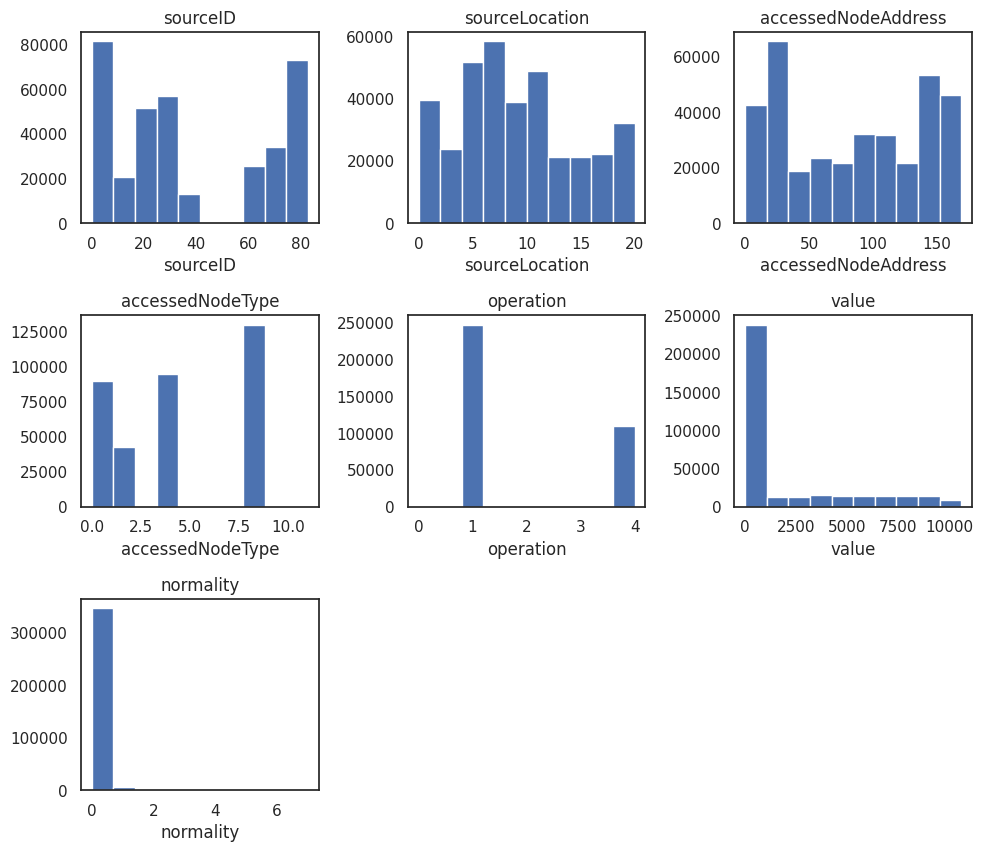

In [ ]:
# Plotting histograms for visualizing the frequency of original data
a = 4  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(10,11))

for i in modified_dataset.columns:
    plt.subplot(a, b, c)
    plt.hist(modified_dataset[i])
    plt.title(format(i))
    plt.xlabel(i)
    c = c + 1
fig.tight_layout()
plt.show()

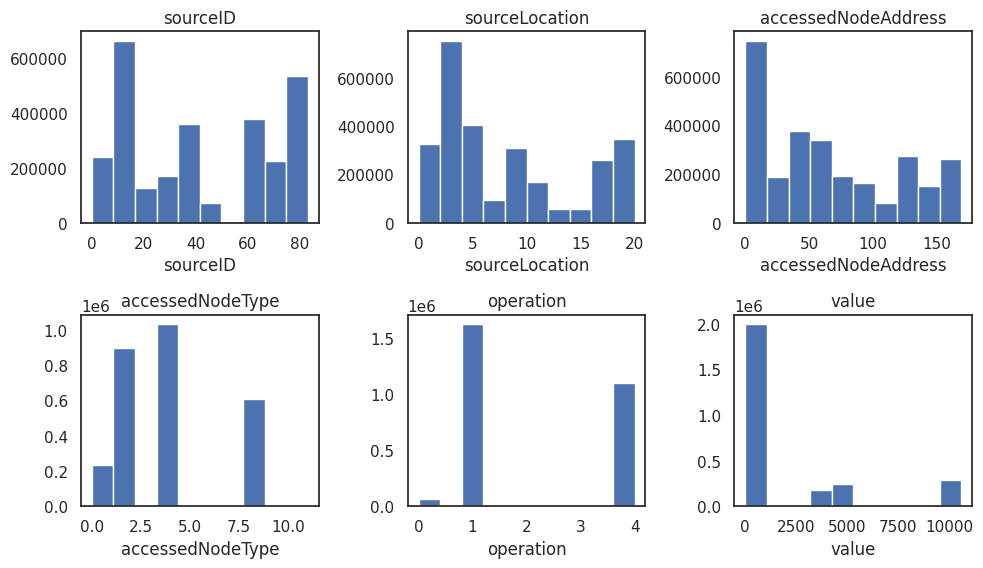

In [ ]:
# Plotting histograms for visualizing the frequency of synthetic data generated through SMOTE
a = 4  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(10,11))

for i in X_smote.columns:
    plt.subplot(a, b, c)
    plt.hist(X_smote[i])
    plt.title(format(i))
    plt.xlabel(i)
    c = c + 1
fig.tight_layout()
plt.show()

Text(0.5, 1.0, 'Synthetic Data - SMOTE')

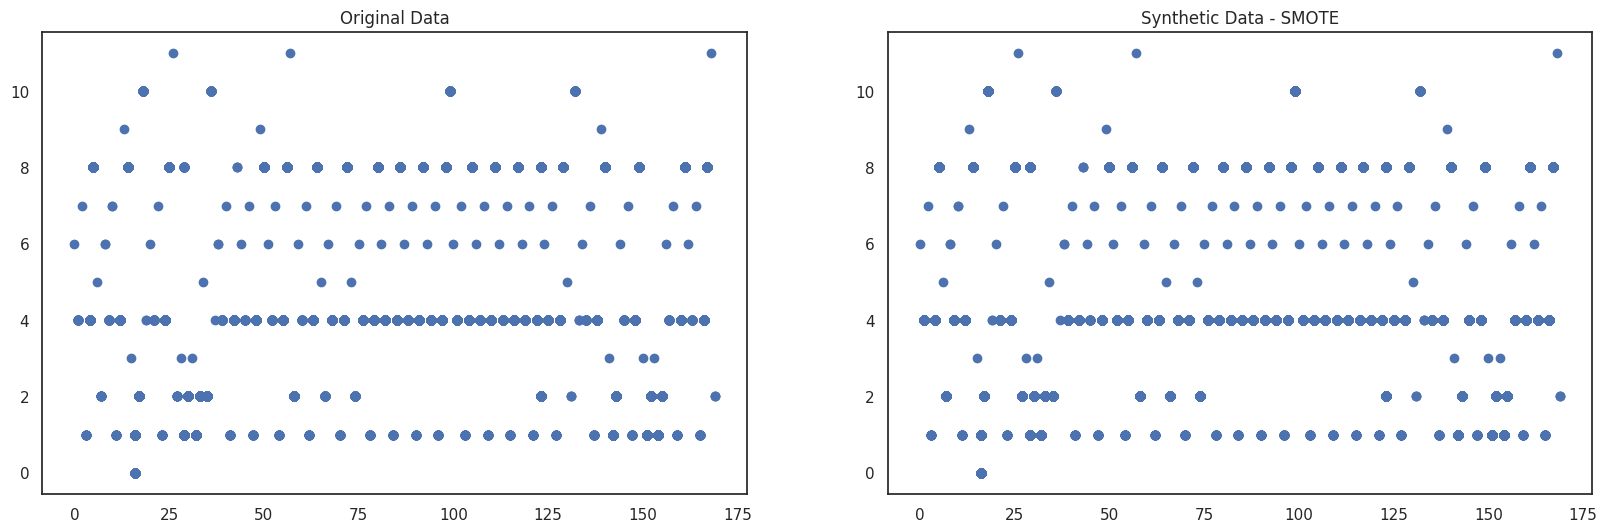

In [ ]:
# Plotting Scatter plot to visualize the original data and synthetic data generated by SMOTE
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
ax[0].scatter(modified_dataset.iloc[:, 2], modified_dataset.iloc[:, 3])
ax[1].scatter(X_smote.iloc[:, 2], X_smote.iloc[:, 3])
ax[0].set_title("Original Data")
ax[1].set_title("Synthetic Data - SMOTE")

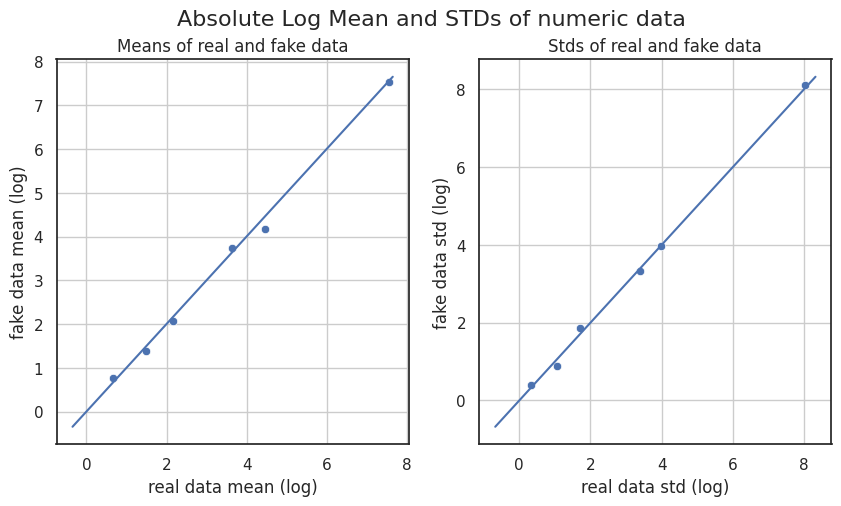

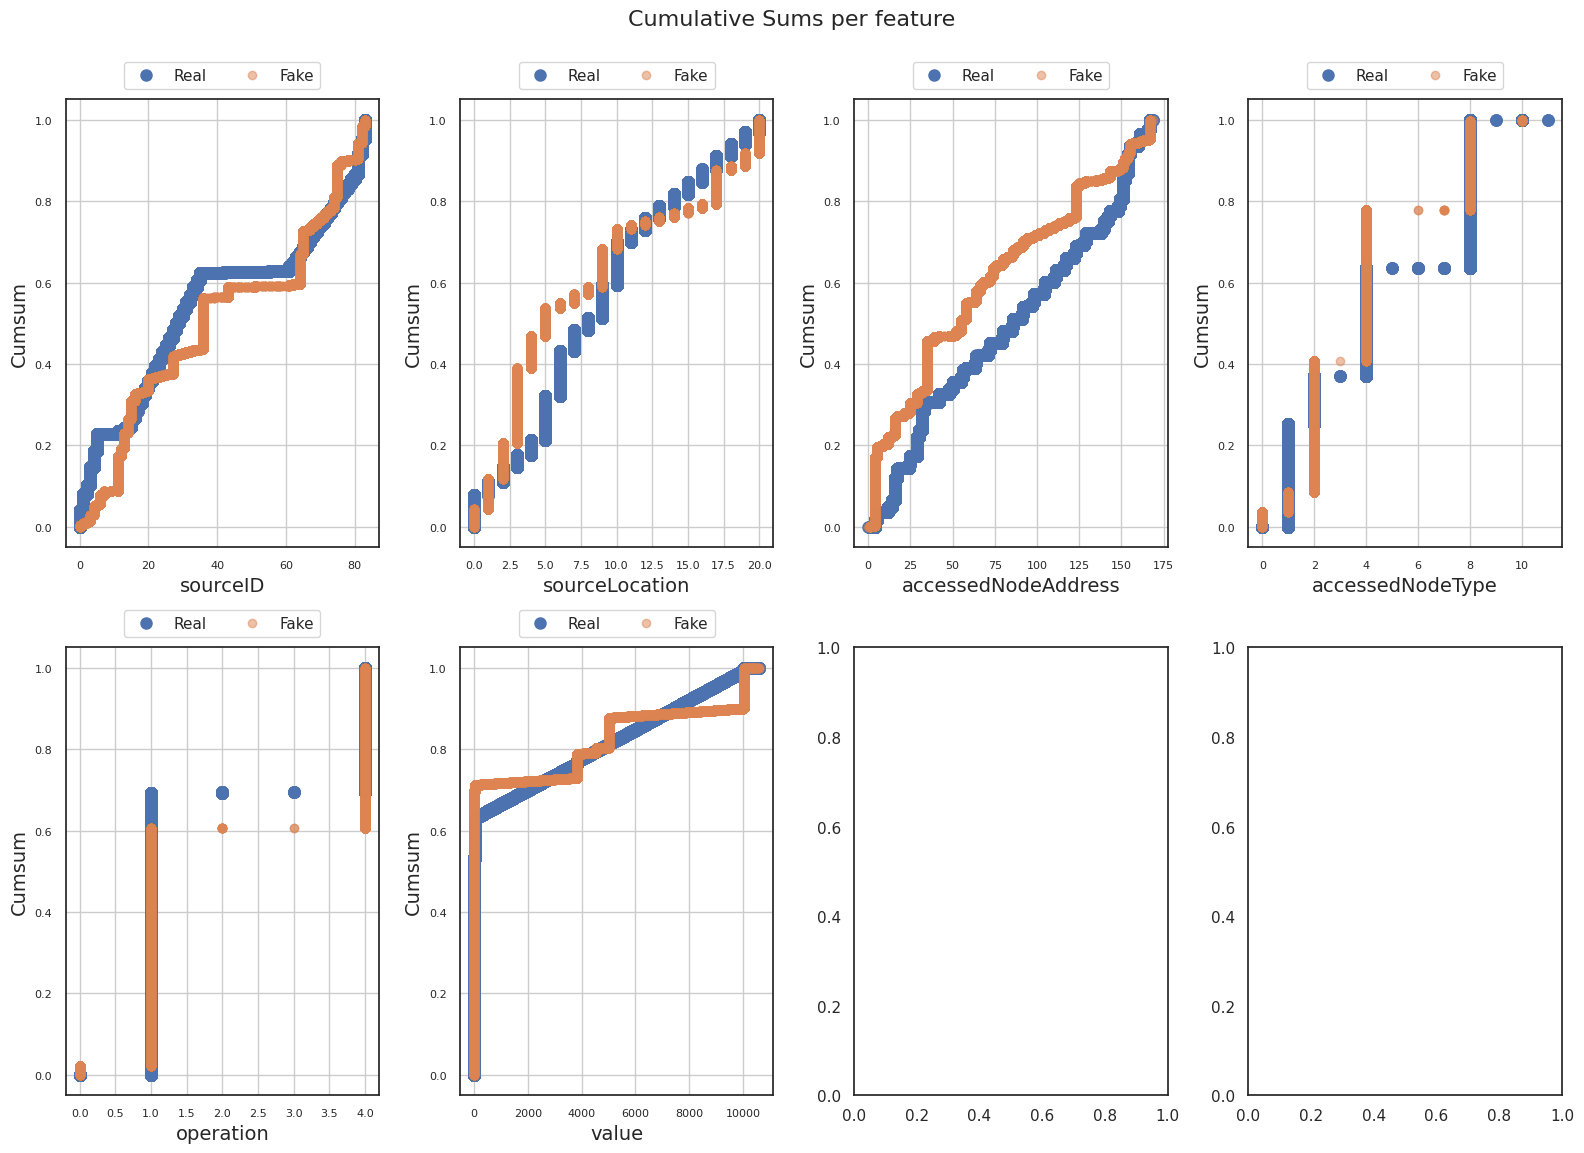

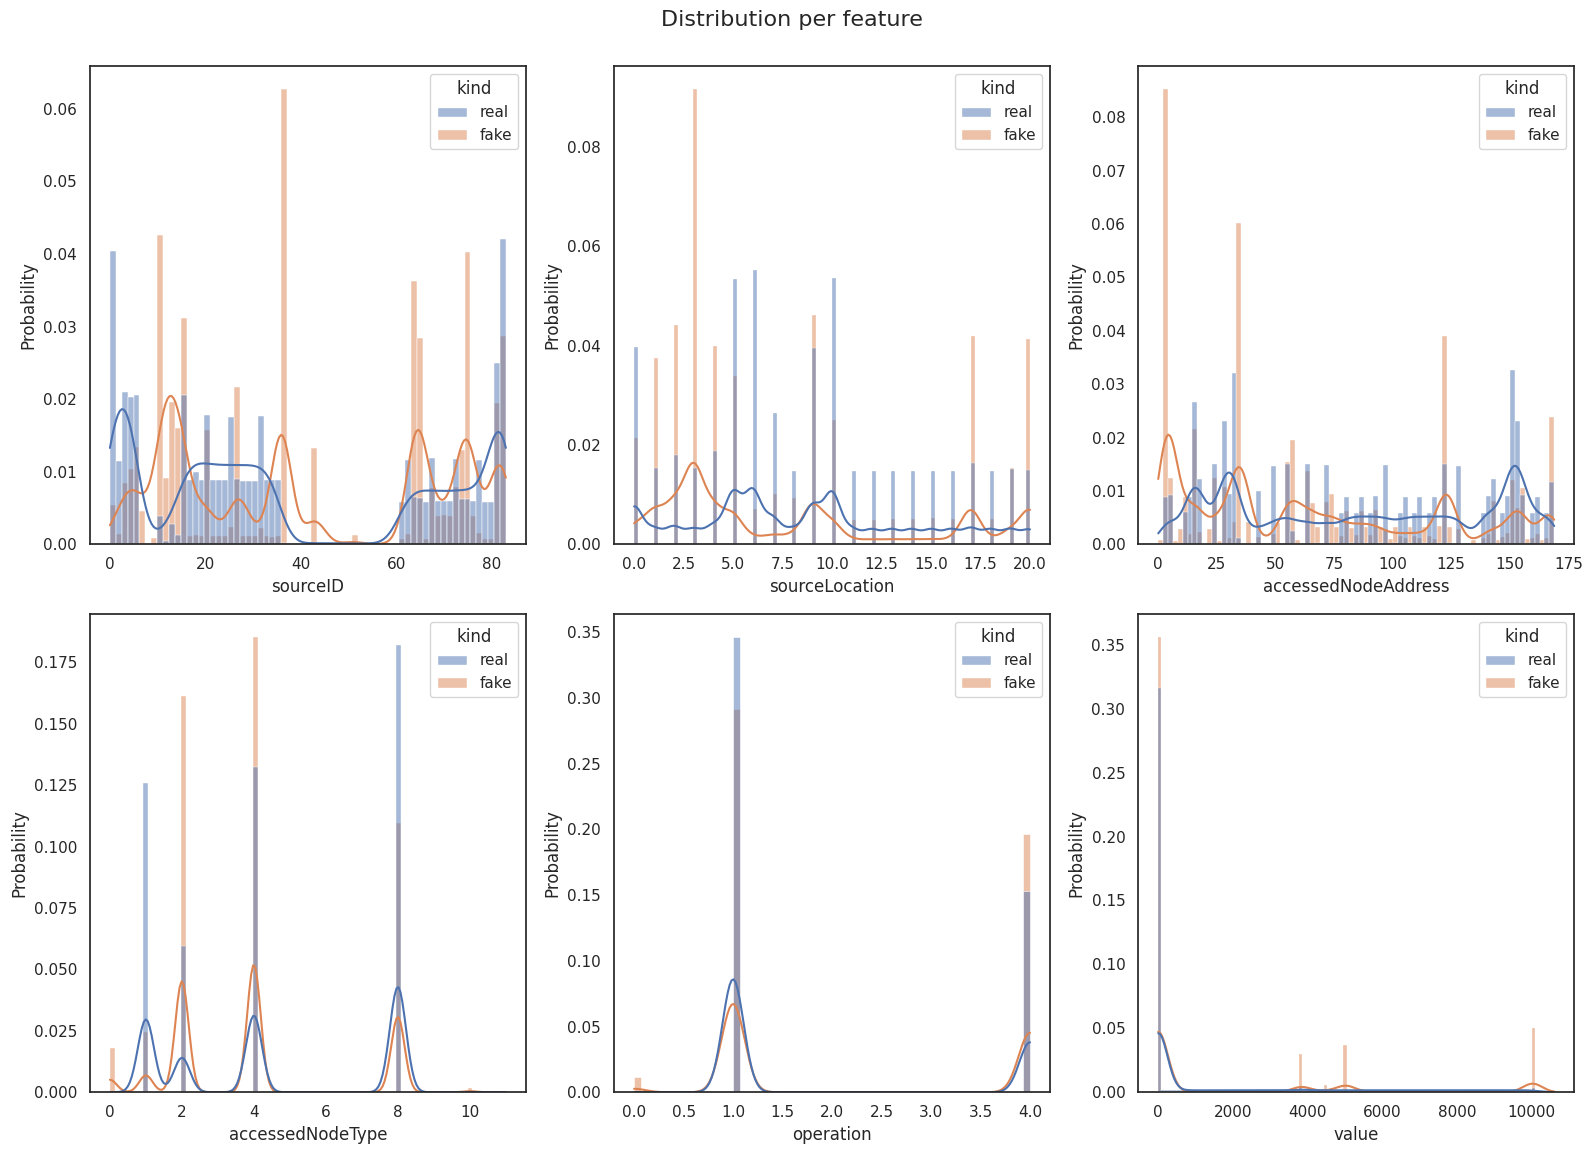

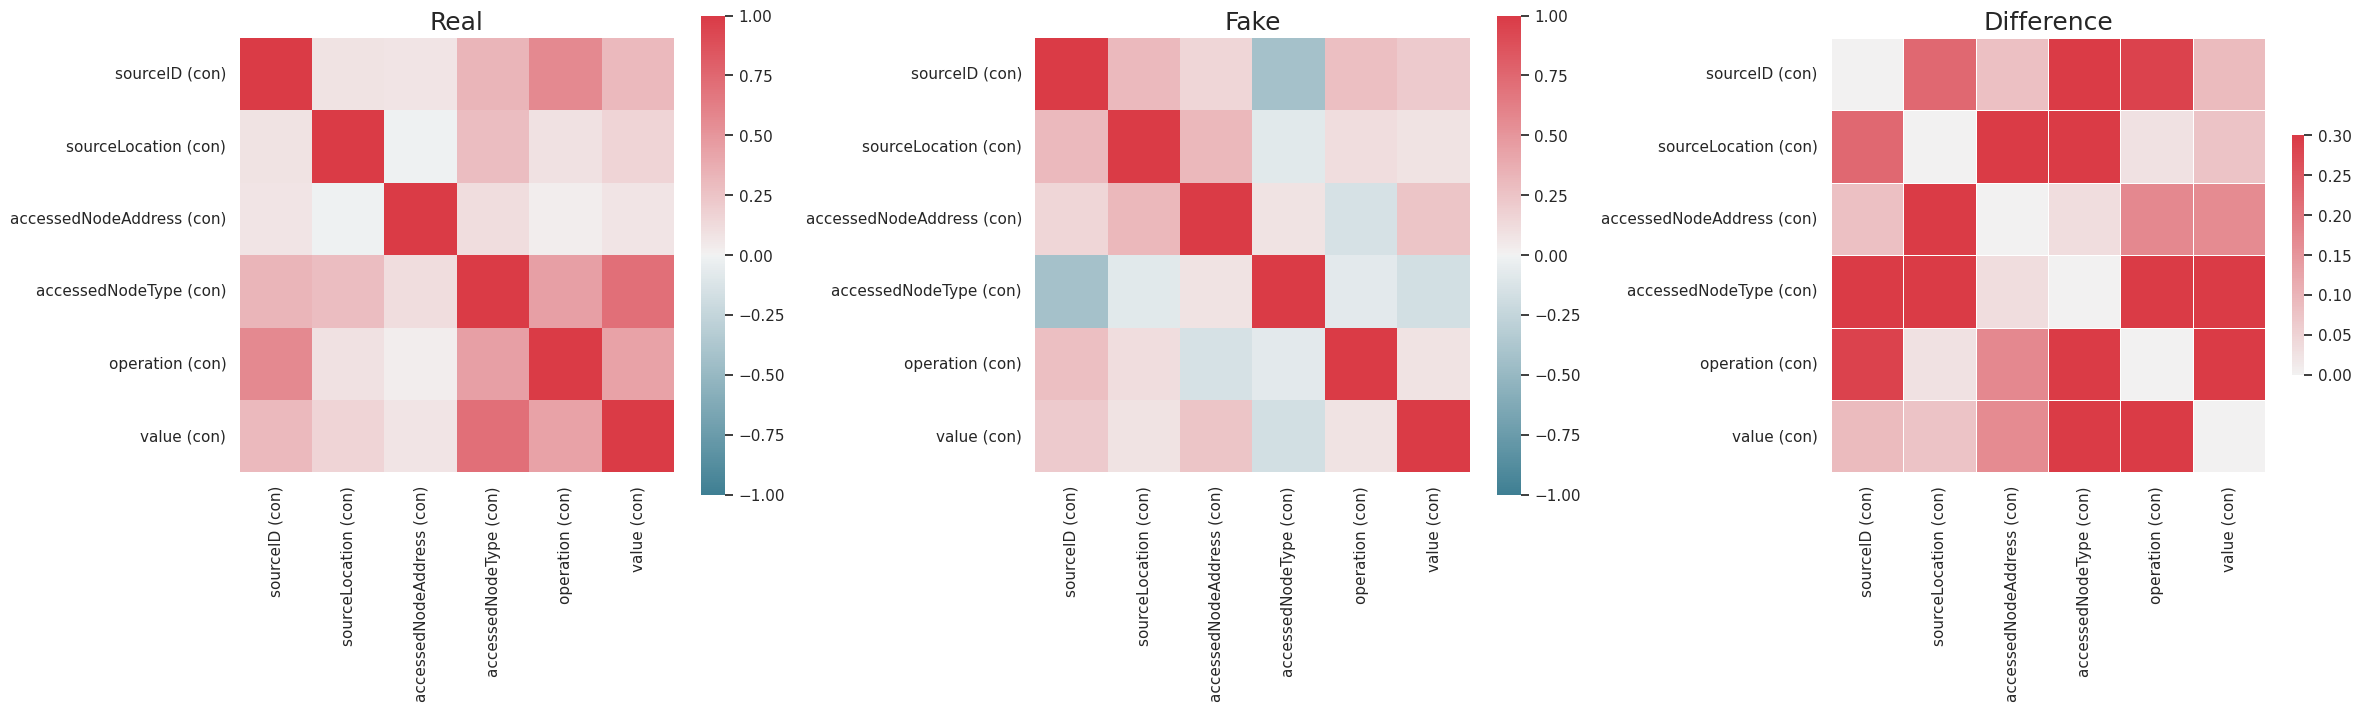

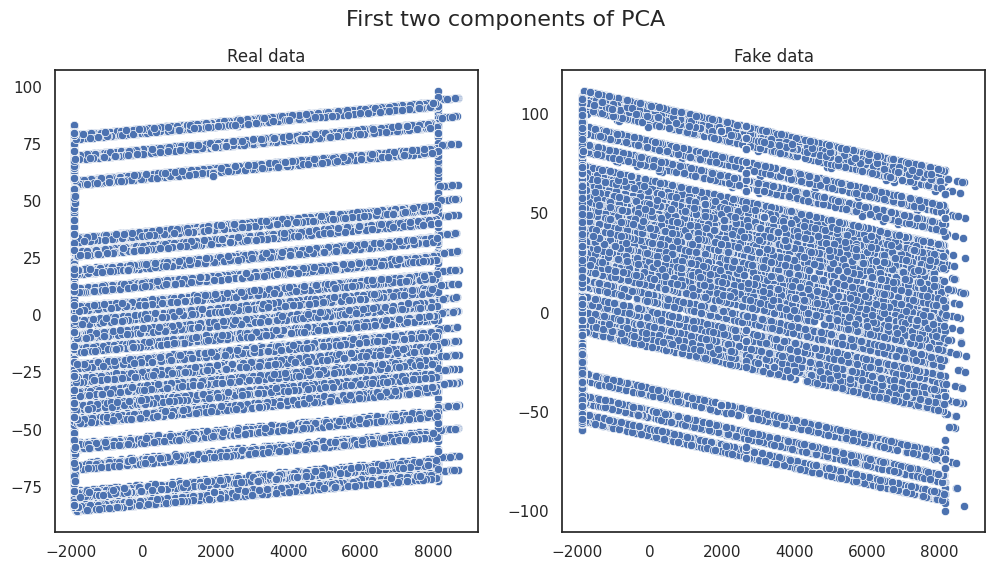

In [ ]:
table_evaluator = TableEvaluator(modified_dataset[['sourceID','sourceLocation','accessedNodeAddress','accessedNodeType','operation','value']], X_smote)
table_evaluator.visual_evaluation()

#### Calling algorithms for SMOTE generated data



normality
0    347935
2    347935
4    347935
1    347935
5    347935
6    347935
7    347935
3    347935
Name: count, dtype: int64
**************** Random Forest Classifier ******************
Confusion Matrix 


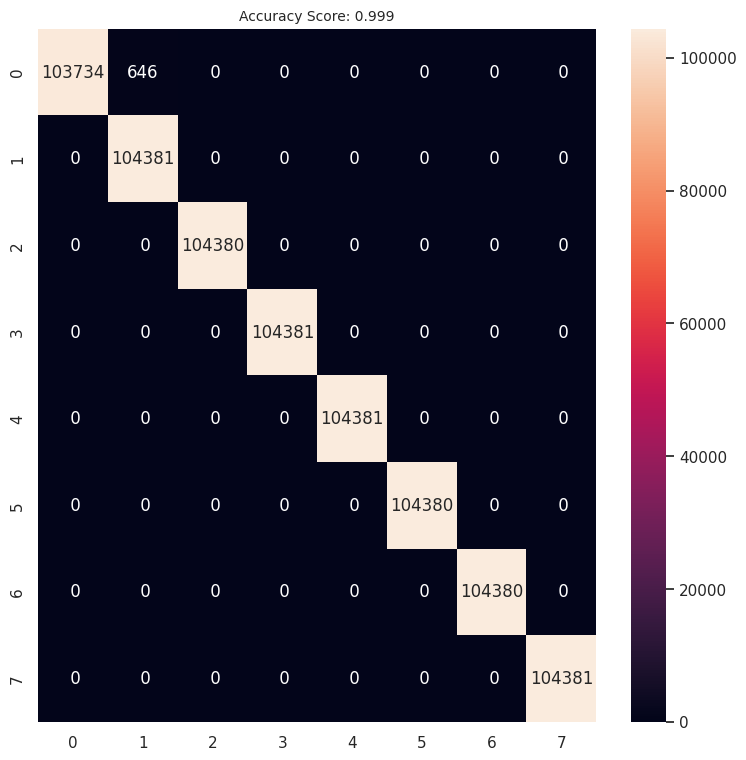

[[103734    646      0      0      0      0      0      0]
 [     0 104381      0      0      0      0      0      0]
 [     0      0 104380      0      0      0      0      0]
 [     0      0      0 104381      0      0      0      0]
 [     0      0      0      0 104381      0      0      0]
 [     0      0      0      0      0 104380      0      0]
 [     0      0      0      0      0      0 104380      0]
 [     0      0      0      0      0      0      0 104381]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    104380
           1       0.99      1.00      1.00    104381
           2       1.00      1.00      1.00    104380
           3       1.00      1.00      1.00    104381
           4       1.00      1.00      1.00    104381
           5       1.00      1.00      1.00    104380
           6       1.00      1.00      1.00    104380
           7       1.00      1.00      1.00    104381

    accuracy                           

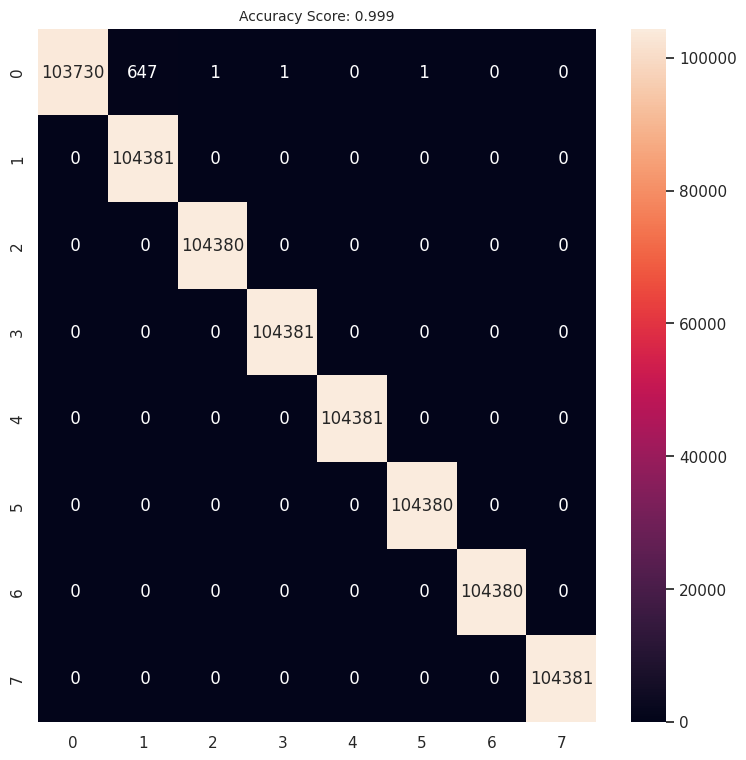

[[103730    647      1      1      0      1      0      0]
 [     0 104381      0      0      0      0      0      0]
 [     0      0 104380      0      0      0      0      0]
 [     0      0      0 104381      0      0      0      0]
 [     0      0      0      0 104381      0      0      0]
 [     0      0      0      0      0 104380      0      0]
 [     0      0      0      0      0      0 104380      0]
 [     0      0      0      0      0      0      0 104381]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    104380
           1       0.99      1.00      1.00    104381
           2       1.00      1.00      1.00    104380
           3       1.00      1.00      1.00    104381
           4       1.00      1.00      1.00    104381
           5       1.00      1.00      1.00    104380
           6       1.00      1.00      1.00    104380
           7       1.00      1.00      1.00    104381

    accuracy                           

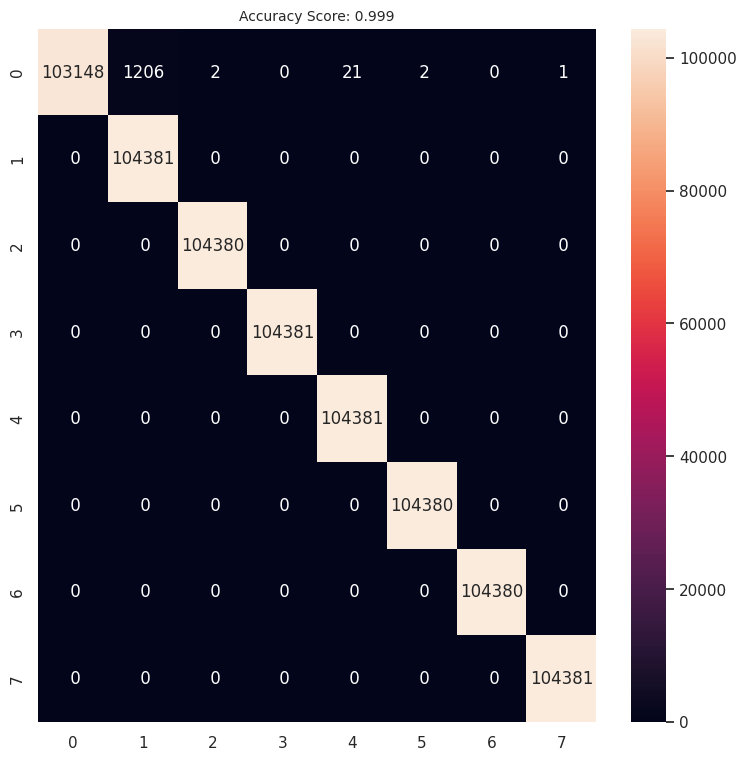

[[103148   1206      2      0     21      2      0      1]
 [     0 104381      0      0      0      0      0      0]
 [     0      0 104380      0      0      0      0      0]
 [     0      0      0 104381      0      0      0      0]
 [     0      0      0      0 104381      0      0      0]
 [     0      0      0      0      0 104380      0      0]
 [     0      0      0      0      0      0 104380      0]
 [     0      0      0      0      0      0      0 104381]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    104380
           1       0.99      1.00      0.99    104381
           2       1.00      1.00      1.00    104380
           3       1.00      1.00      1.00    104381
           4       1.00      1.00      1.00    104381
           5       1.00      1.00      1.00    104380
           6       1.00      1.00      1.00    104380
           7       1.00      1.00      1.00    104381

    accuracy                           

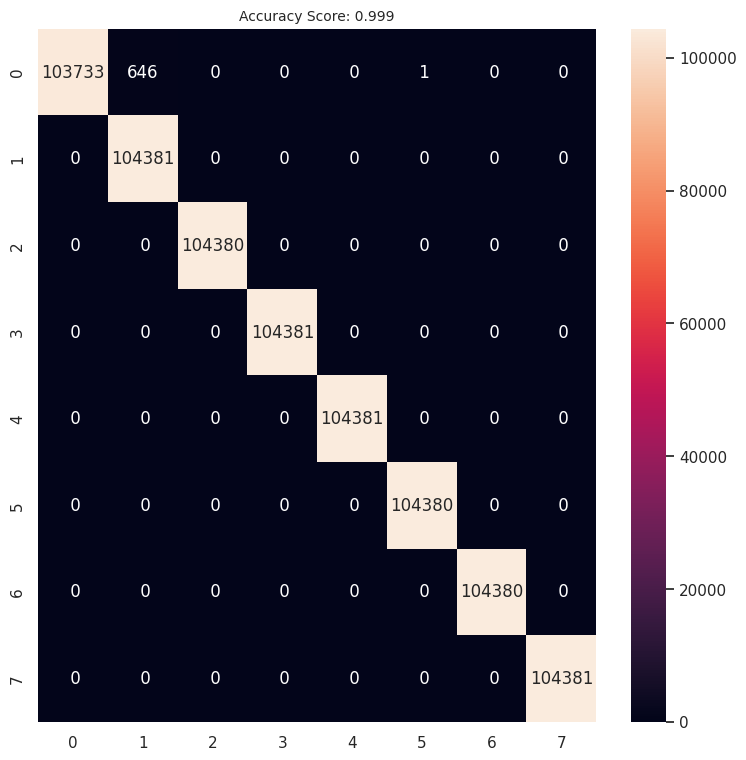

[[103733    646      0      0      0      1      0      0]
 [     0 104381      0      0      0      0      0      0]
 [     0      0 104380      0      0      0      0      0]
 [     0      0      0 104381      0      0      0      0]
 [     0      0      0      0 104381      0      0      0]
 [     0      0      0      0      0 104380      0      0]
 [     0      0      0      0      0      0 104380      0]
 [     0      0      0      0      0      0      0 104381]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    104380
           1       0.99      1.00      1.00    104381
           2       1.00      1.00      1.00    104380
           3       1.00      1.00      1.00    104381
           4       1.00      1.00      1.00    104381
           5       1.00      1.00      1.00    104380
           6       1.00      1.00      1.00    104380
           7       1.00      1.00      1.00    104381

    accuracy                           

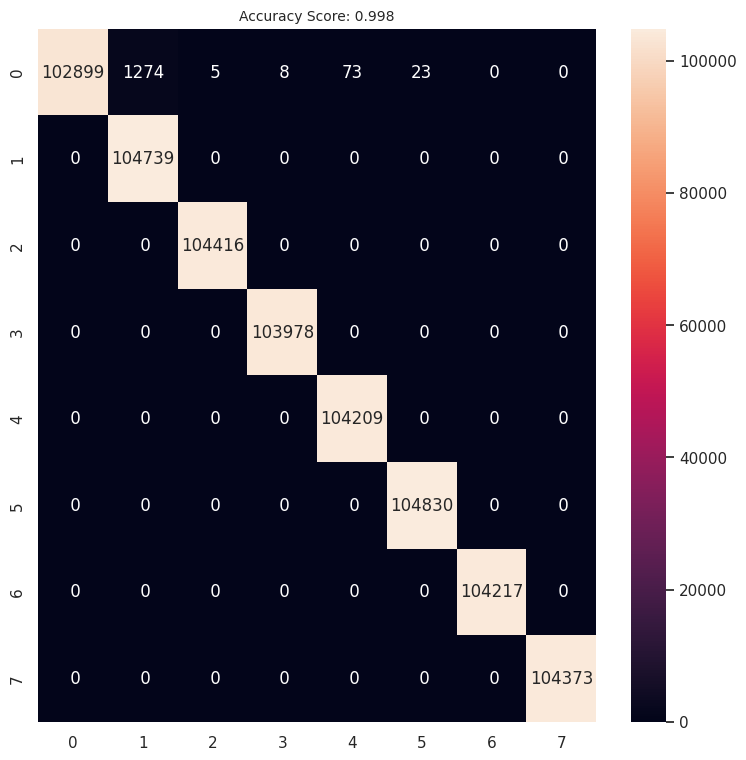

[[102899   1274      5      8     73     23      0      0]
 [     0 104739      0      0      0      0      0      0]
 [     0      0 104416      0      0      0      0      0]
 [     0      0      0 103978      0      0      0      0]
 [     0      0      0      0 104209      0      0      0]
 [     0      0      0      0      0 104830      0      0]
 [     0      0      0      0      0      0 104217      0]
 [     0      0      0      0      0      0      0 104373]]
Neural Network Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    104282
           1       0.99      1.00      0.99    104739
           2       1.00      1.00      1.00    104416
           3       1.00      1.00      1.00    103978
           4       1.00      1.00      1.00    104209
           5       1.00      1.00      1.00    104830
           6       1.00      1.00      1.00    104217
           7       1.00      1.00      1.00    104373

 

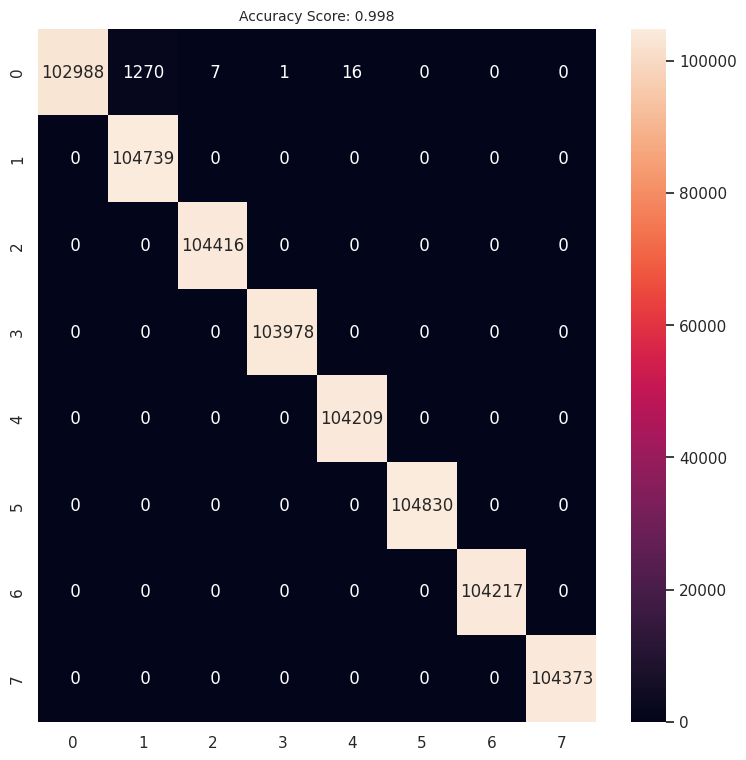

[[102988   1270      7      1     16      0      0      0]
 [     0 104739      0      0      0      0      0      0]
 [     0      0 104416      0      0      0      0      0]
 [     0      0      0 103978      0      0      0      0]
 [     0      0      0      0 104209      0      0      0]
 [     0      0      0      0      0 104830      0      0]
 [     0      0      0      0      0      0 104217      0]
 [     0      0      0      0      0      0      0 104373]]
LSTM Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    104282
           1       0.99      1.00      0.99    104739
           2       1.00      1.00      1.00    104416
           3       1.00      1.00      1.00    103978
           4       1.00      1.00      1.00    104209
           5       1.00      1.00      1.00    104830
           6       1.00      1.00      1.00    104217
           7       1.00      1.00      1.00    104373

    accurac

In [ ]:
X_data = X_smote.copy()
y_data = Y_smote.copy()

print(y_data.value_counts())

results_smote = call_algorithm(X_data,y_data,'SMOTE',10)

In [ ]:
display(results_smote.head(10))

Run Type                 Algorithm  Training Accuracy  Testing Accuracy  \
0    SMOTE  Random Forest Classifier           0.999160          0.999226   
1    SMOTE  Decision Tree Classifier           0.999159          0.999222   
2    SMOTE      MLP - Neural Network           0.998455          0.998525   
3    SMOTE                   XGBoost           0.999158          0.999225   
4    SMOTE            Neural Network           0.998379          0.998344   
5    SMOTE                LSTM - RNN           0.998489          0.998450   

   Recall Score  Precision Score  F1 Score  
0      0.999226         0.999231  0.999226  
1      0.999222         0.999226  0.999222  
2      0.998525         0.998541  0.998524  
3      0.999225         0.999230  0.999225  
4      0.998342         0.998367  0.998345  
5      0.998449         0.998474  0.998452

#### Using Random Undersampling to generate synthetic data

In [ ]:
# Copying dataset into a new dataframe
rus_df = modified_dataset.copy()

X = rus_df.drop('normality',axis=1)
y = rus_df['normality']

# Calling RandomUnderSampler to generate synthetic data
rus = under_sampling.RandomUnderSampler(sampling_strategy='auto',random_state=rand_state)

# Resampling the data
X_rus, y_rus = rus.fit_resample(X, y)

# Printing count in target feature
print(y_rus.value_counts())

normality
0    122
1    122
2    122
3    122
4    122
5    122
6    122
7    122
Name: count, dtype: int64


Text(0.5, 1.0, 'Synthetic Data - Random Under-sampling')

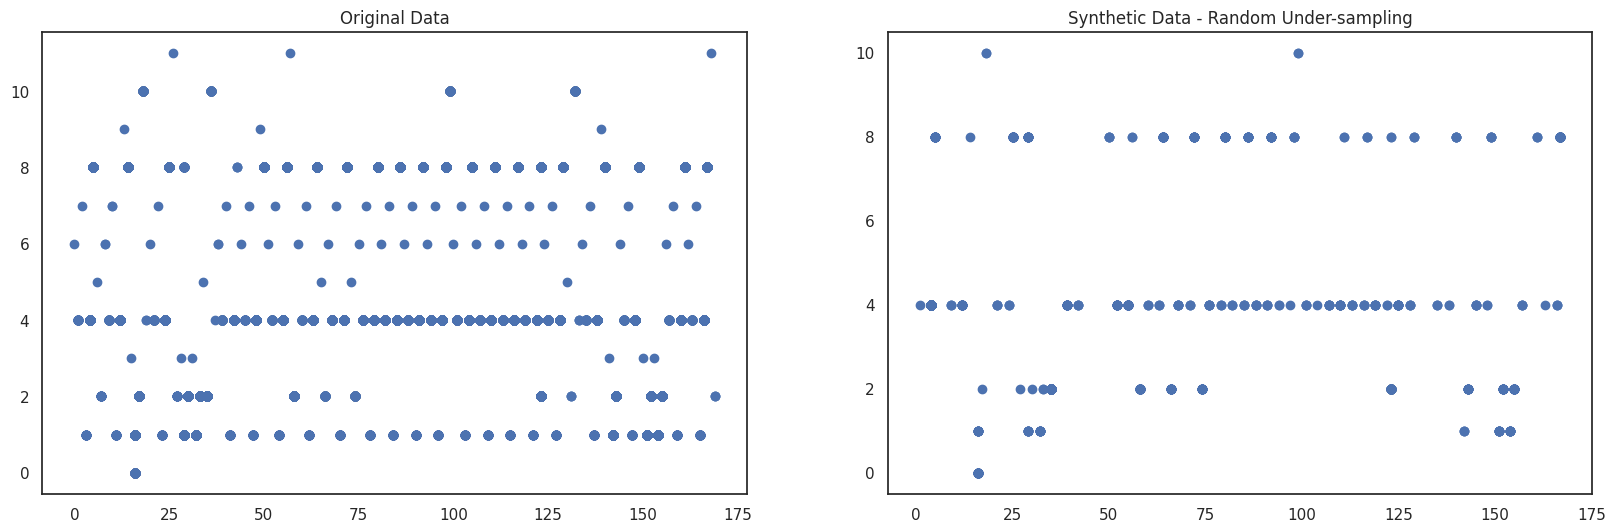

In [ ]:
# Plotting Scatter plot to visualize the original data and synthetic data generated by Random Under-sampling
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
ax[0].scatter(modified_dataset.iloc[:, 2], modified_dataset.iloc[:, 3])
ax[1].scatter(X_rus.iloc[:, 2], X_rus.iloc[:, 3])
ax[0].set_title("Original Data")
ax[1].set_title("Synthetic Data - Random Under-sampling")

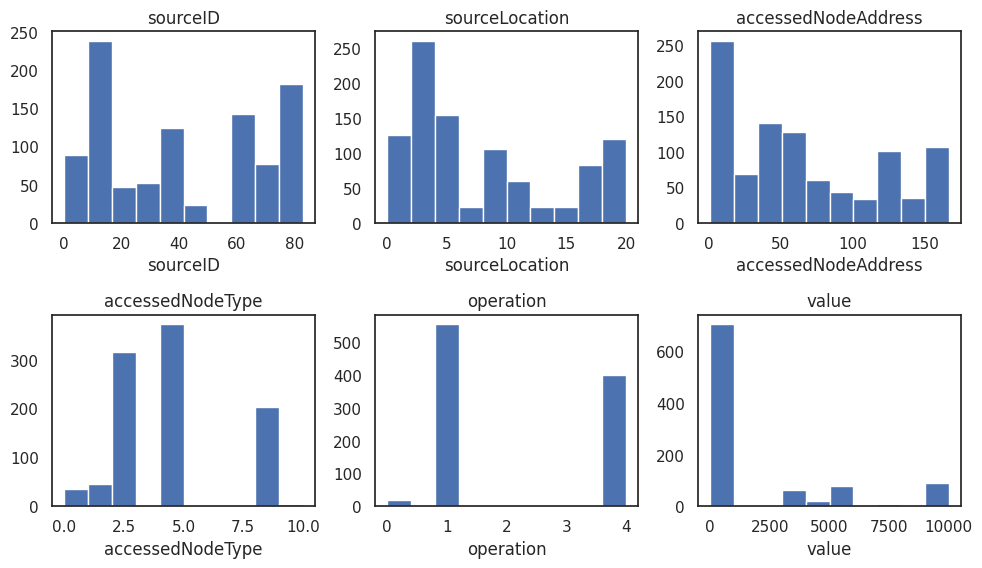

In [ ]:
# Plotting histograms for visualizing the frequency of synthetic data generated through Random Under-sampling
a = 4  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(10,11))

for i in X_rus.columns:
    plt.subplot(a, b, c)
    plt.hist(X_rus[i])
    plt.title(format(i))
    plt.xlabel(i)
    c = c + 1
fig.tight_layout()
plt.show()

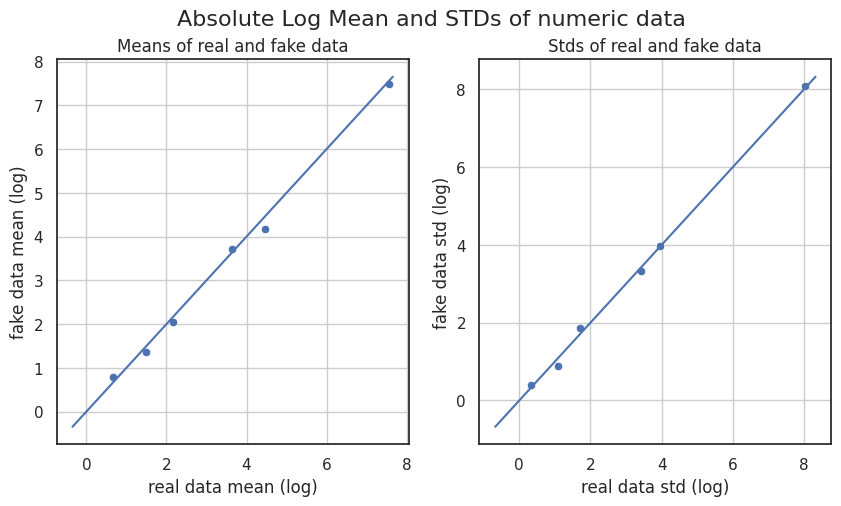

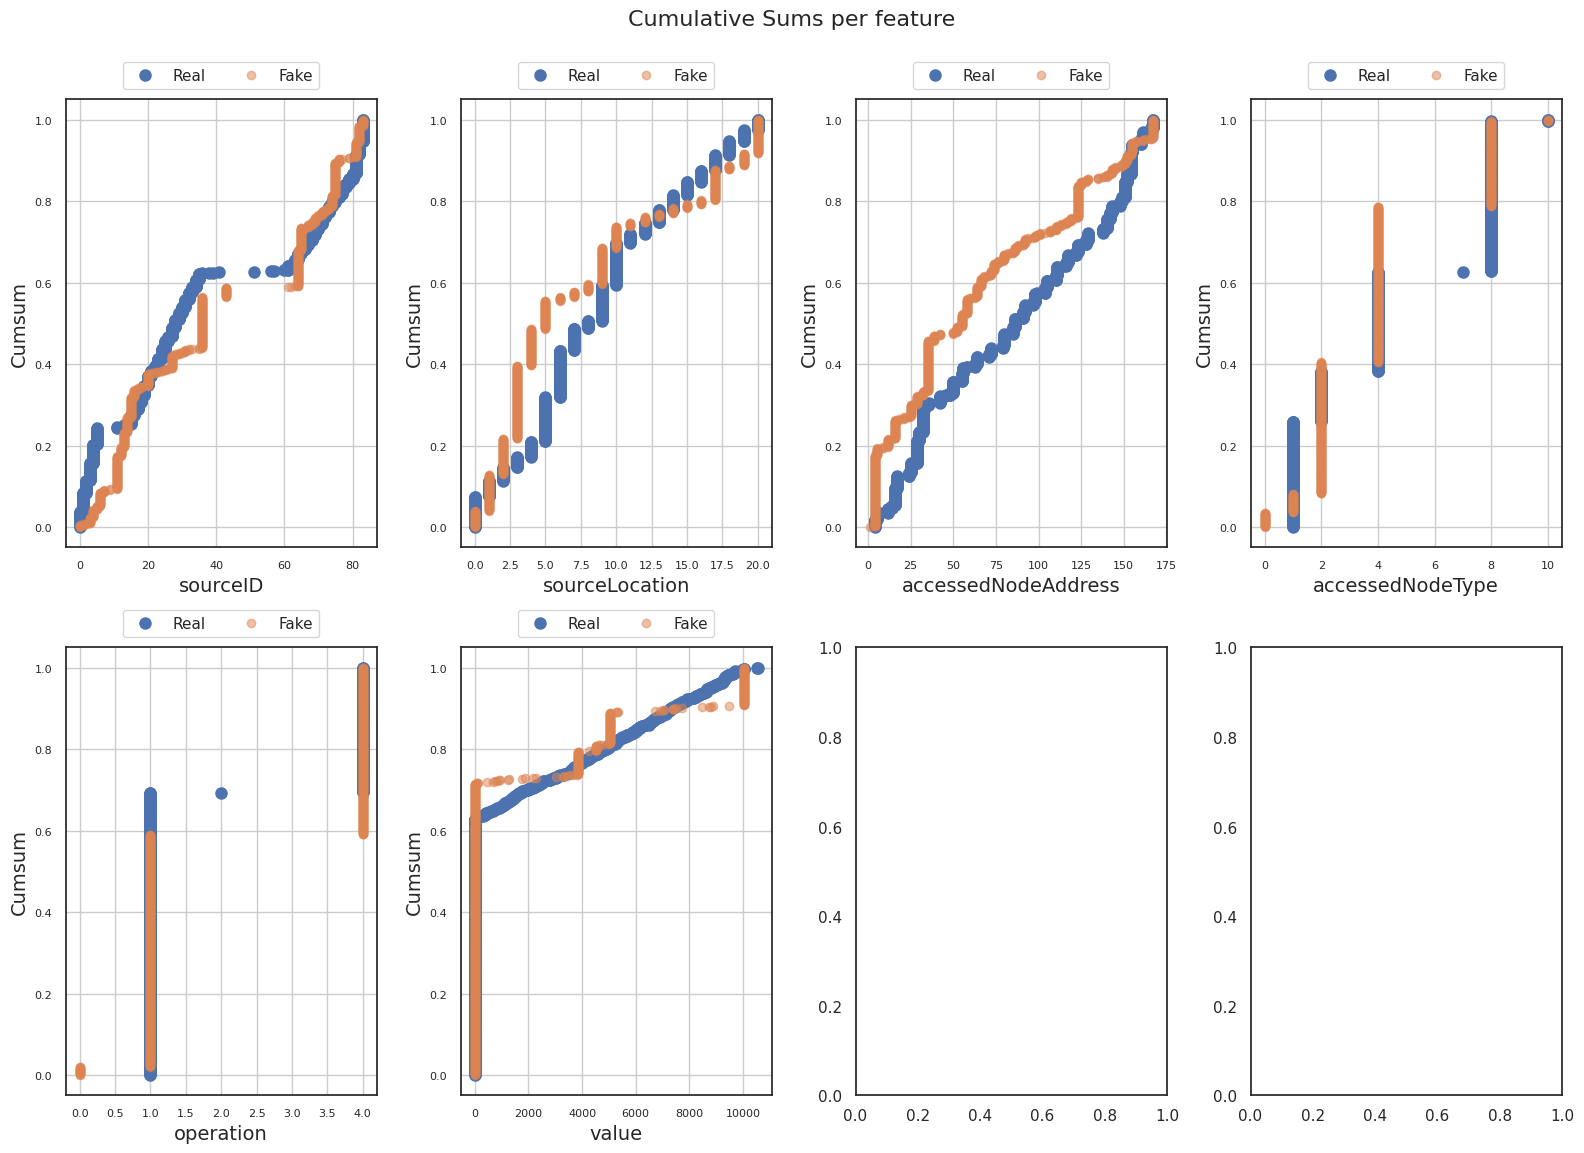

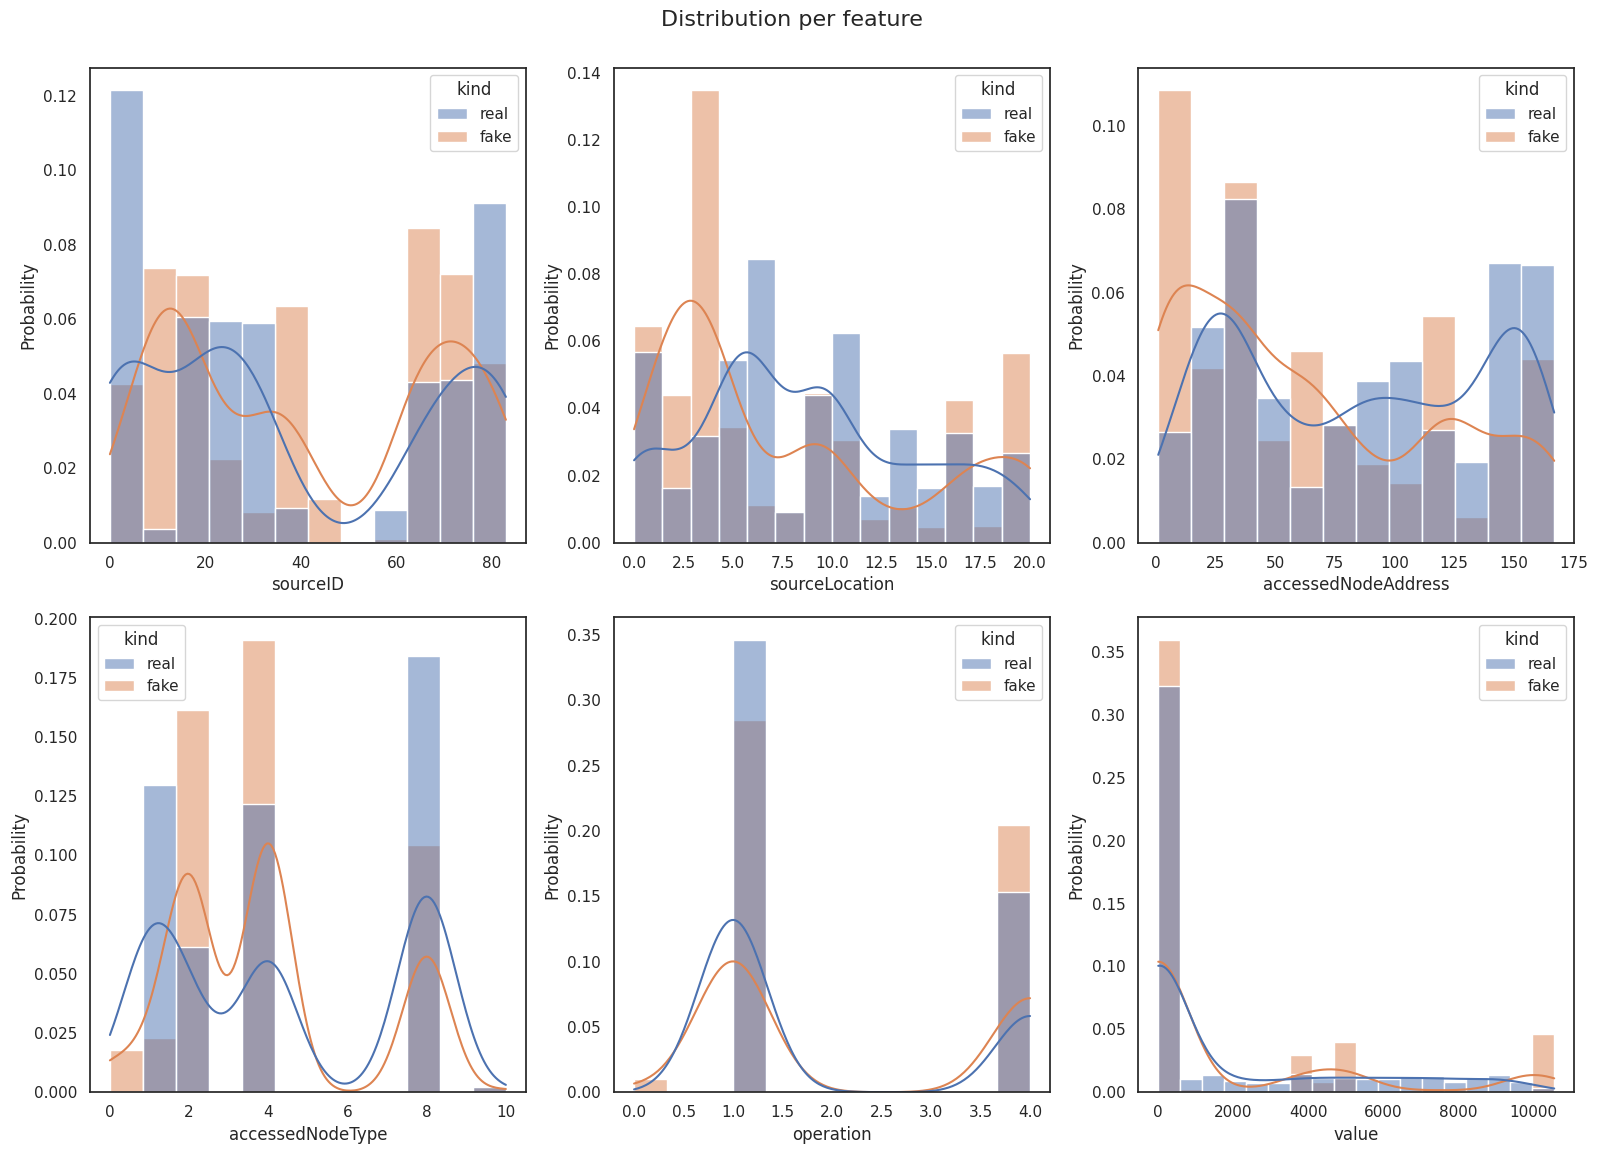

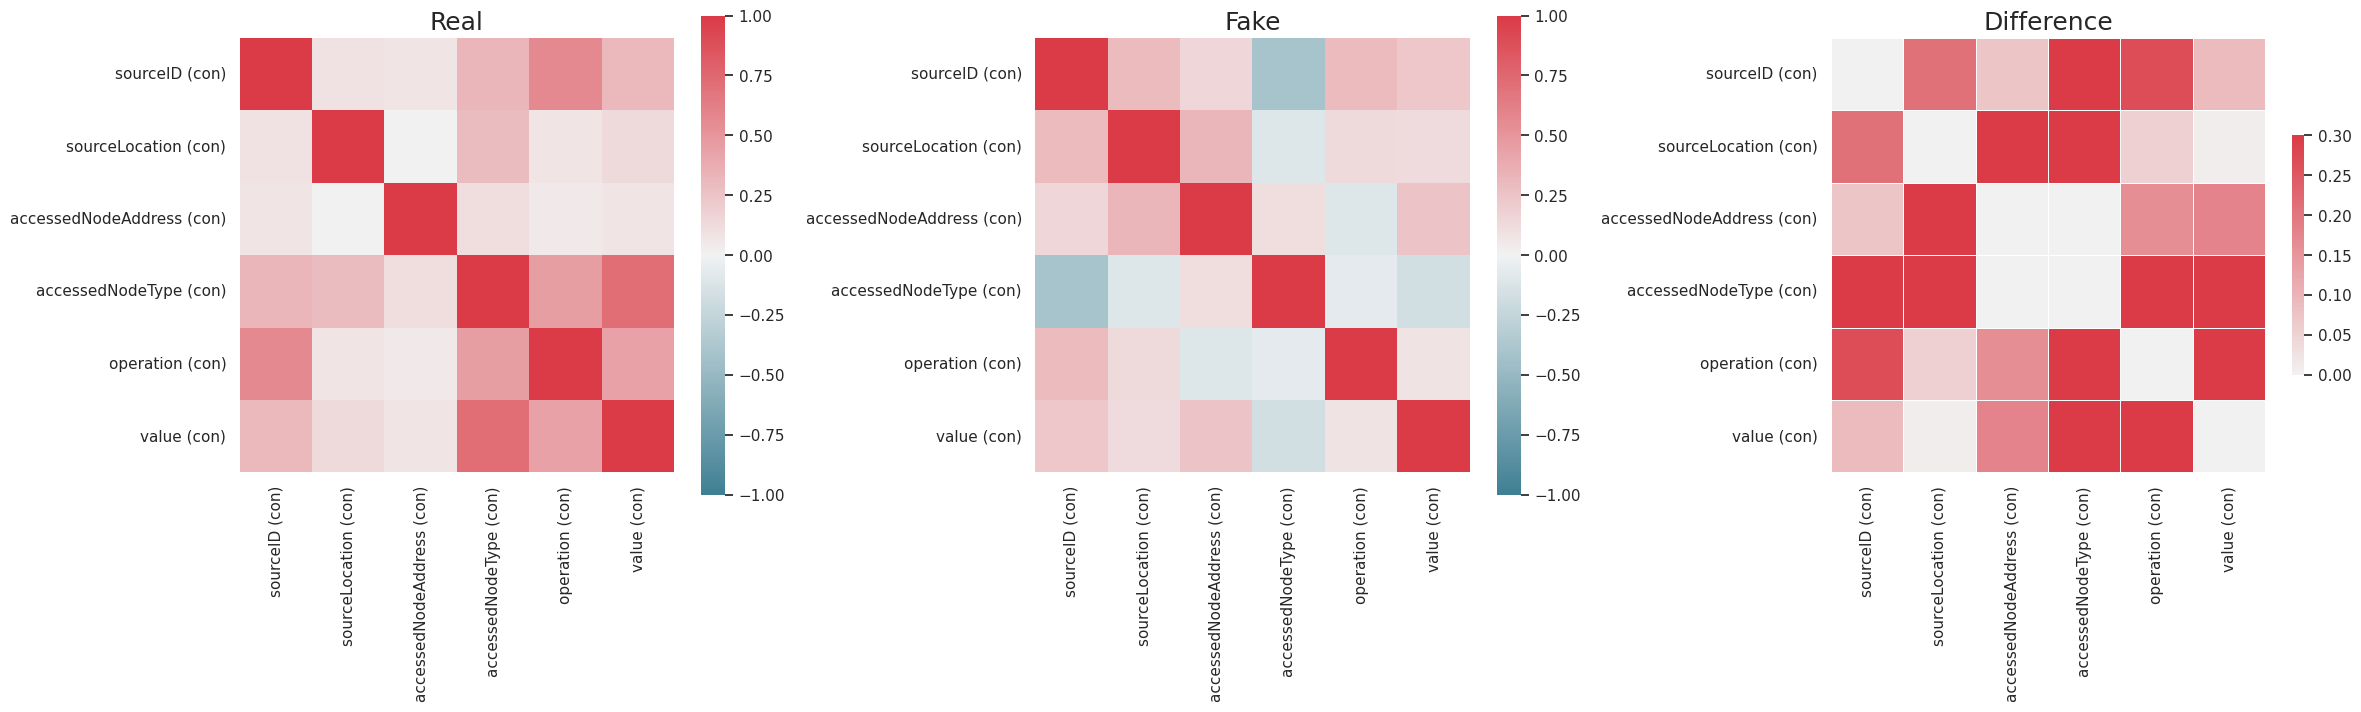

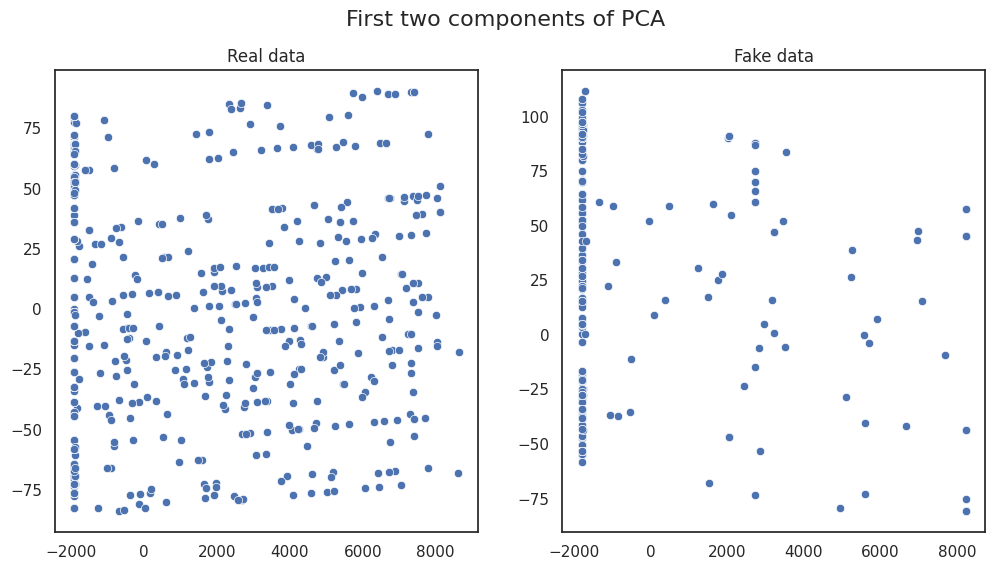

In [ ]:
table_evaluator = TableEvaluator(modified_dataset[['sourceID','sourceLocation','accessedNodeAddress','accessedNodeType','operation','value']], X_rus)
table_evaluator.visual_evaluation()

#### Calling algorithms for undersampled data

normality
0    122
1    122
2    122
3    122
4    122
5    122
6    122
7    122
Name: count, dtype: int64
**************** Random Forest Classifier ******************
Confusion Matrix 


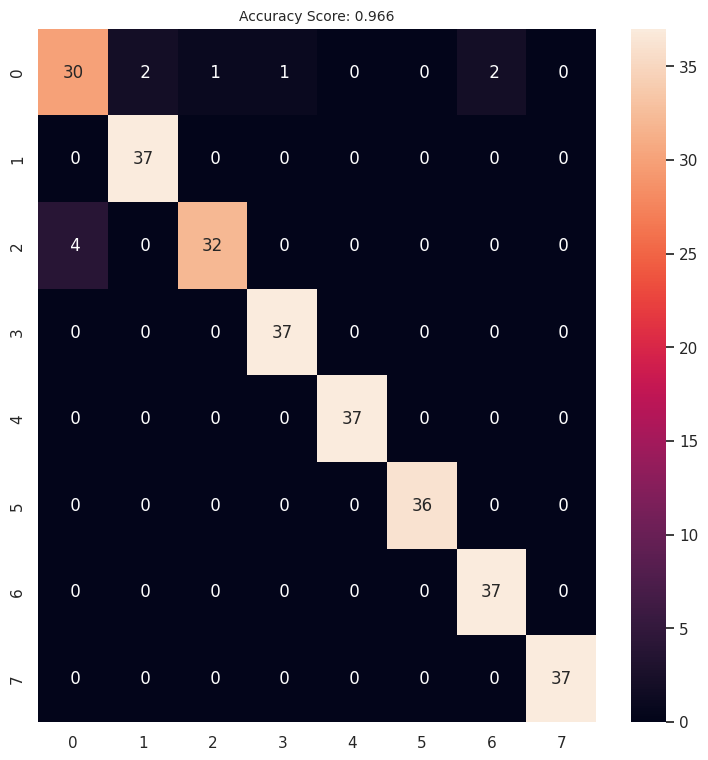

[[30  2  1  1  0  0  2  0]
 [ 0 37  0  0  0  0  0  0]
 [ 4  0 32  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0]
 [ 0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0 36  0  0]
 [ 0  0  0  0  0  0 37  0]
 [ 0  0  0  0  0  0  0 37]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.86        36
           1       0.95      1.00      0.97        37
           2       0.97      0.89      0.93        36
           3       0.97      1.00      0.99        37
           4       1.00      1.00      1.00        37
           5       1.00      1.00      1.00        36
           6       0.95      1.00      0.97        37
           7       1.00      1.00      1.00        37

    accuracy                           0.97       293
   macro avg       0.97      0.97      0.96       293
weighted avg       0.97      0.97      0.97       293

**************** Decision Tree Classifier ******************
Confusion Matrix 


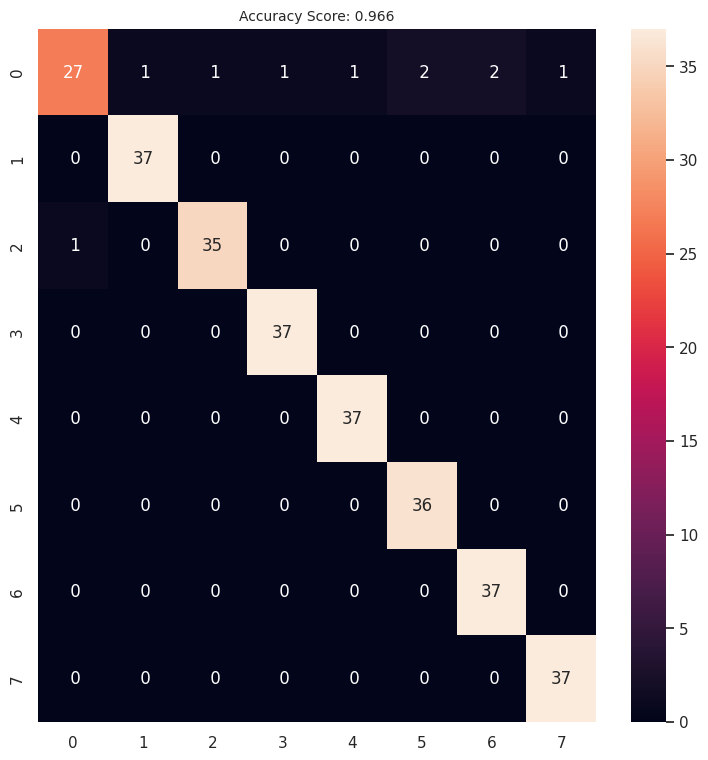

[[27  1  1  1  1  2  2  1]
 [ 0 37  0  0  0  0  0  0]
 [ 1  0 35  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0]
 [ 0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0 36  0  0]
 [ 0  0  0  0  0  0 37  0]
 [ 0  0  0  0  0  0  0 37]]
              precision    recall  f1-score   support

           0       0.96      0.75      0.84        36
           1       0.97      1.00      0.99        37
           2       0.97      0.97      0.97        36
           3       0.97      1.00      0.99        37
           4       0.97      1.00      0.99        37
           5       0.95      1.00      0.97        36
           6       0.95      1.00      0.97        37
           7       0.97      1.00      0.99        37

    accuracy                           0.97       293
   macro avg       0.97      0.97      0.96       293
weighted avg       0.97      0.97      0.96       293

**************** MLP - Neural Network ******************
Confusion Matrix 


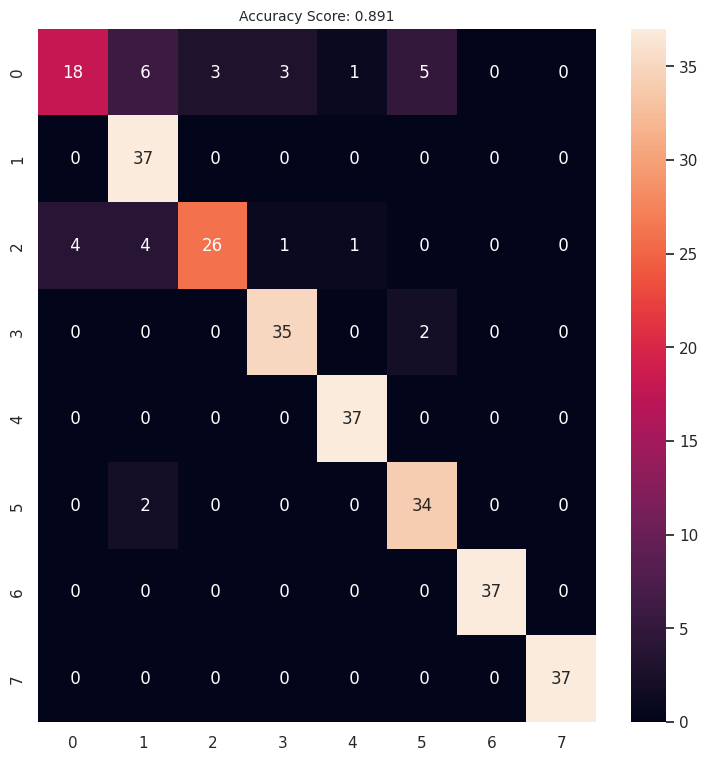

[[18  6  3  3  1  5  0  0]
 [ 0 37  0  0  0  0  0  0]
 [ 4  4 26  1  1  0  0  0]
 [ 0  0  0 35  0  2  0  0]
 [ 0  0  0  0 37  0  0  0]
 [ 0  2  0  0  0 34  0  0]
 [ 0  0  0  0  0  0 37  0]
 [ 0  0  0  0  0  0  0 37]]
              precision    recall  f1-score   support

           0       0.82      0.50      0.62        36
           1       0.76      1.00      0.86        37
           2       0.90      0.72      0.80        36
           3       0.90      0.95      0.92        37
           4       0.95      1.00      0.97        37
           5       0.83      0.94      0.88        36
           6       1.00      1.00      1.00        37
           7       1.00      1.00      1.00        37

    accuracy                           0.89       293
   macro avg       0.89      0.89      0.88       293
weighted avg       0.89      0.89      0.88       293

**************** XGBoost ******************
Confusion Matrix 


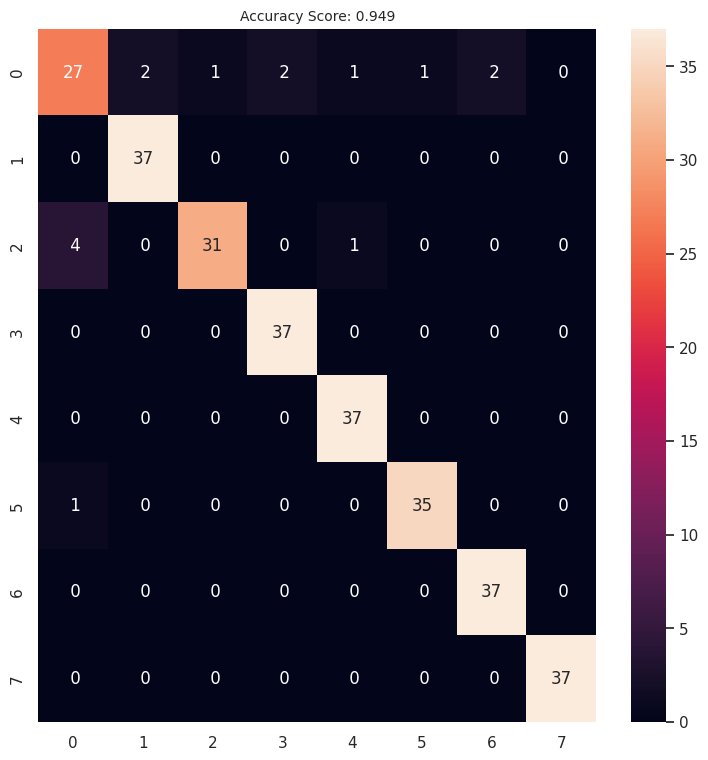

[[27  2  1  2  1  1  2  0]
 [ 0 37  0  0  0  0  0  0]
 [ 4  0 31  0  1  0  0  0]
 [ 0  0  0 37  0  0  0  0]
 [ 0  0  0  0 37  0  0  0]
 [ 1  0  0  0  0 35  0  0]
 [ 0  0  0  0  0  0 37  0]
 [ 0  0  0  0  0  0  0 37]]
              precision    recall  f1-score   support

           0       0.84      0.75      0.79        36
           1       0.95      1.00      0.97        37
           2       0.97      0.86      0.91        36
           3       0.95      1.00      0.97        37
           4       0.95      1.00      0.97        37
           5       0.97      0.97      0.97        36
           6       0.95      1.00      0.97        37
           7       1.00      1.00      1.00        37

    accuracy                           0.95       293
   macro avg       0.95      0.95      0.95       293
weighted avg       0.95      0.95      0.95       293

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape   

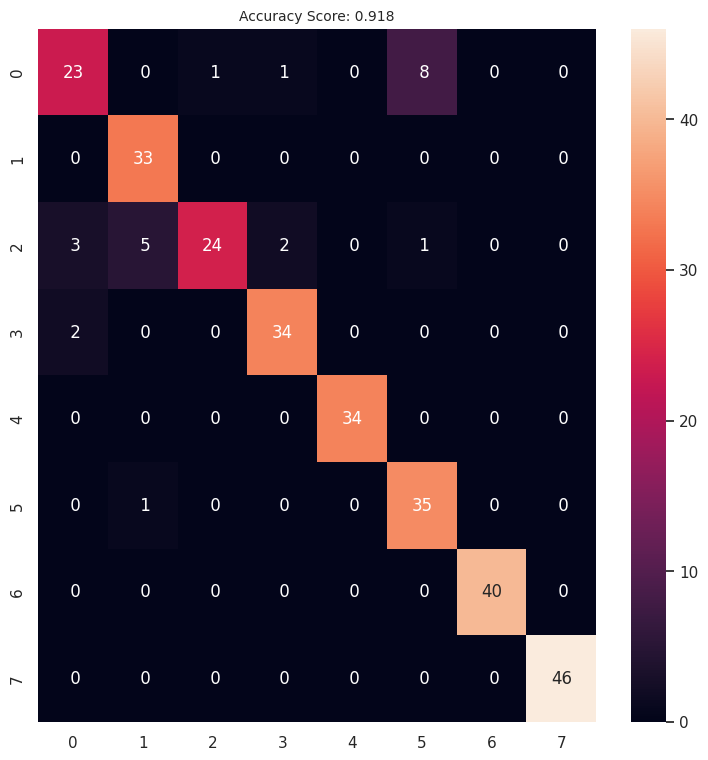

[[23  0  1  1  0  8  0  0]
 [ 0 33  0  0  0  0  0  0]
 [ 3  5 24  2  0  1  0  0]
 [ 2  0  0 34  0  0  0  0]
 [ 0  0  0  0 34  0  0  0]
 [ 0  1  0  0  0 35  0  0]
 [ 0  0  0  0  0  0 40  0]
 [ 0  0  0  0  0  0  0 46]]
Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.70      0.75        33
           1       0.85      1.00      0.92        33
           2       0.96      0.69      0.80        35
           3       0.92      0.94      0.93        36
           4       1.00      1.00      1.00        34
           5       0.80      0.97      0.88        36
           6       1.00      1.00      1.00        40
           7       1.00      1.00      1.00        46

    accuracy                           0.92       293
   macro avg       0.92      0.91      0.91       293
weighted avg       0.92      0.92      0.92       293

Model: "sequential_9"
_________________________________________________________________
 Layer

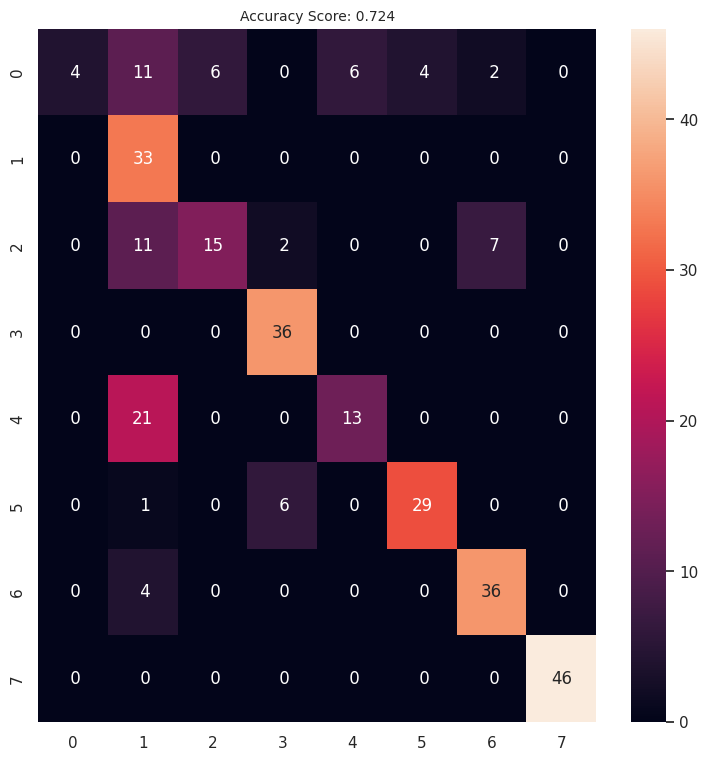

[[ 4 11  6  0  6  4  2  0]
 [ 0 33  0  0  0  0  0  0]
 [ 0 11 15  2  0  0  7  0]
 [ 0  0  0 36  0  0  0  0]
 [ 0 21  0  0 13  0  0  0]
 [ 0  1  0  6  0 29  0  0]
 [ 0  4  0  0  0  0 36  0]
 [ 0  0  0  0  0  0  0 46]]
LSTM Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.12      0.22        33
           1       0.41      1.00      0.58        33
           2       0.71      0.43      0.54        35
           3       0.82      1.00      0.90        36
           4       0.68      0.38      0.49        34
           5       0.88      0.81      0.84        36
           6       0.80      0.90      0.85        40
           7       1.00      1.00      1.00        46

    accuracy                           0.72       293
   macro avg       0.79      0.70      0.68       293
weighted avg       0.80      0.72      0.70       293



In [ ]:
X_data = X_rus.copy()
y_data = y_rus.copy()

print(y_data.value_counts())

results_rus = call_algorithm(X_data,y_data,'Random Undersampling',100)

In [ ]:
display(results_rus.head(10))

Run Type                 Algorithm  Training Accuracy  \
0  Random Undersampling  Random Forest Classifier           0.992690   
1  Random Undersampling  Decision Tree Classifier           0.985401   
2  Random Undersampling      MLP - Neural Network           0.920780   
3  Random Undersampling                   XGBoost           0.994139   
4  Random Undersampling            Neural Network           0.920937   
5  Random Undersampling                LSTM - RNN           0.693997   

   Testing Accuracy  Recall Score  Precision Score  F1 Score  
0          0.965870      0.965278         0.965396  0.964839  
1          0.965870      0.965278         0.965916  0.963662  
2          0.890785      0.889077         0.893157  0.882376  
3          0.948805      0.947917         0.947449  0.946605  
4          0.918089      0.912419         0.917744  0.909659  
5          0.723549      0.704712         0.787859  0.676135

#### Using CTGAN to generate synthetic data

In [ ]:
cols=['normality']

discrete_columns =cols

ctgan = CTGAN(epochs=500)

ctgan.fit(modified_dataset, discrete_columns)

ctgan_synthetic_data = ctgan.sample(400000)

In [ ]:
ctgan_synthetic_data.to_csv('/content/drive/My Drive/Colab Notebooks/ctgan_synthetic_data.csv')

In [ ]:
X_ctgan = ctgan_synthetic_data.drop('normality',axis=1)
y_ctgan = ctgan_synthetic_data['normality']

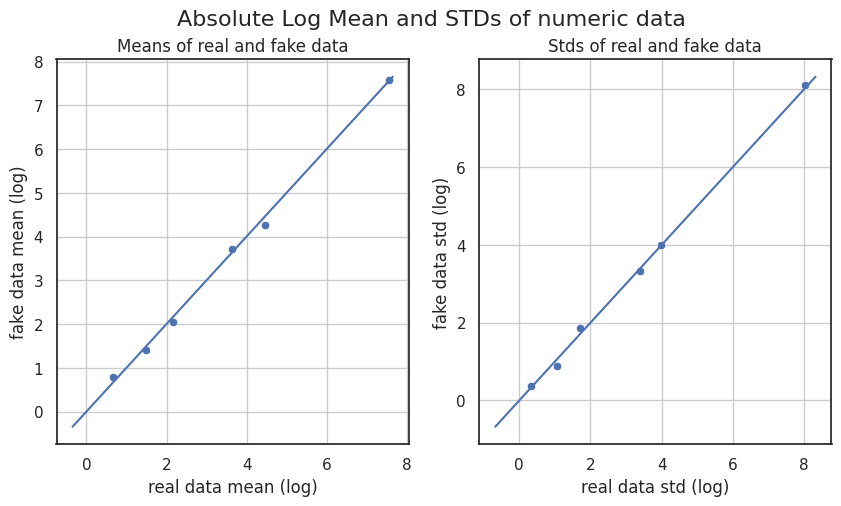

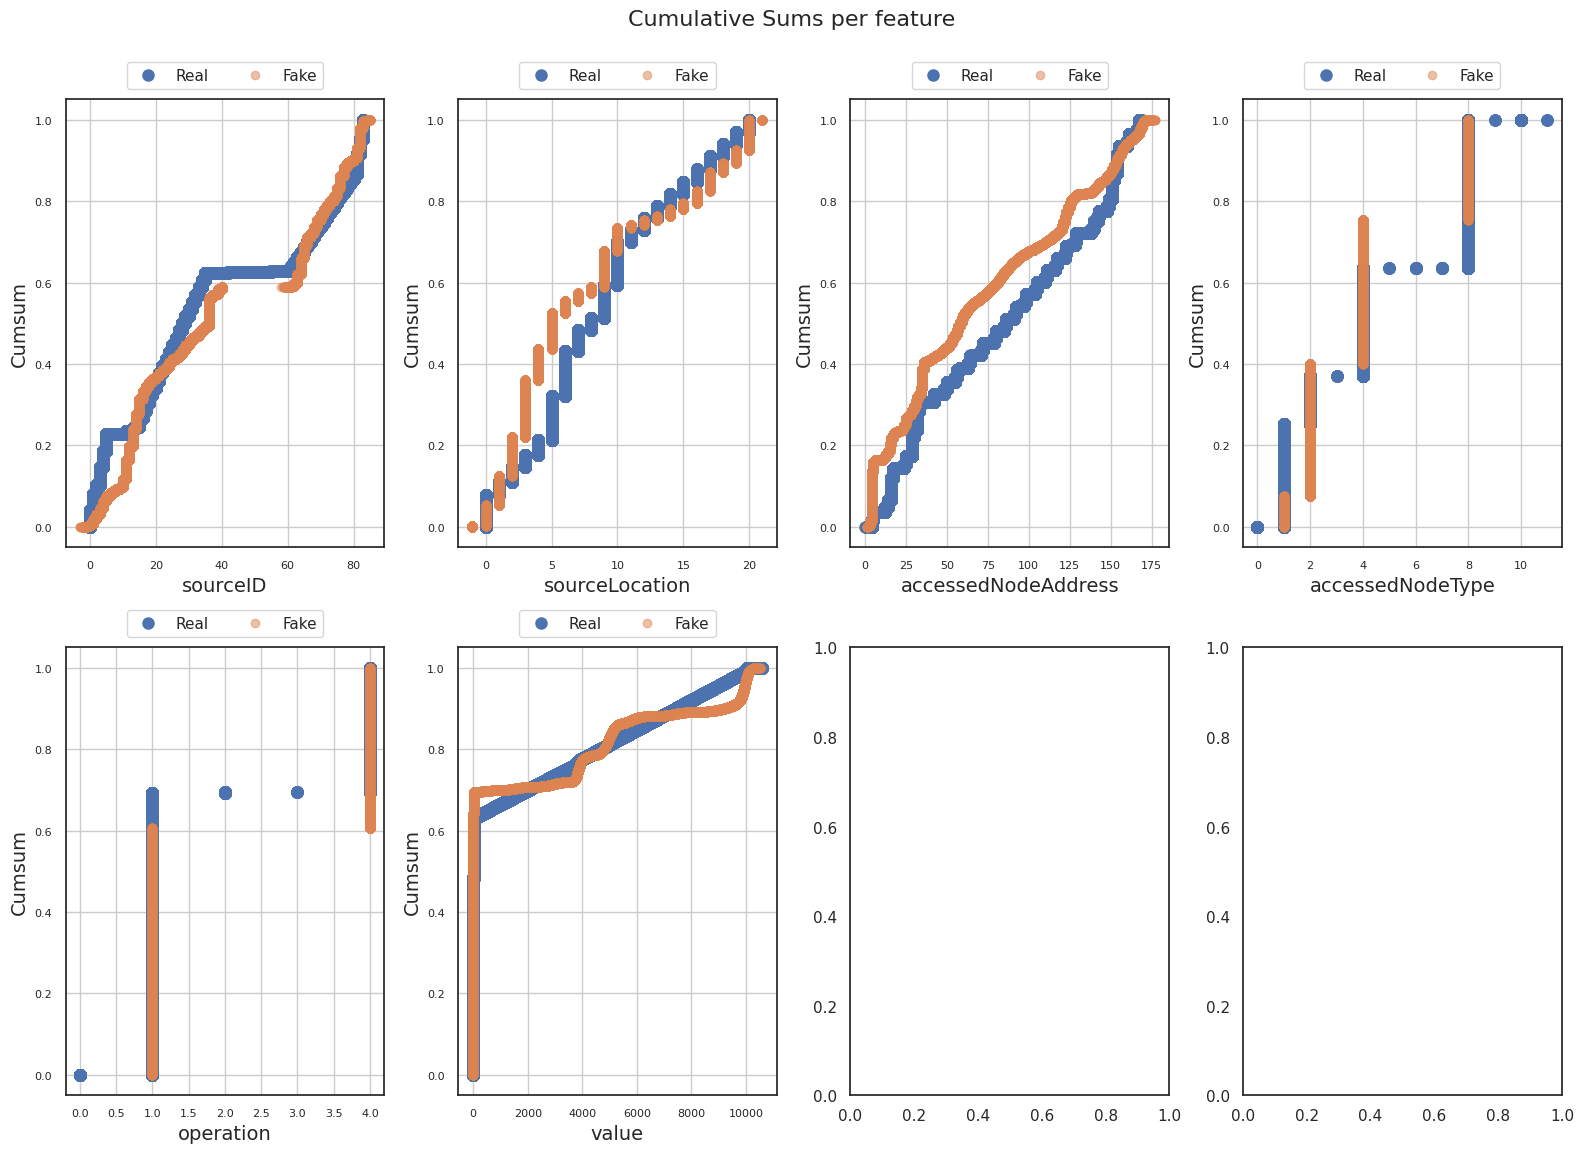

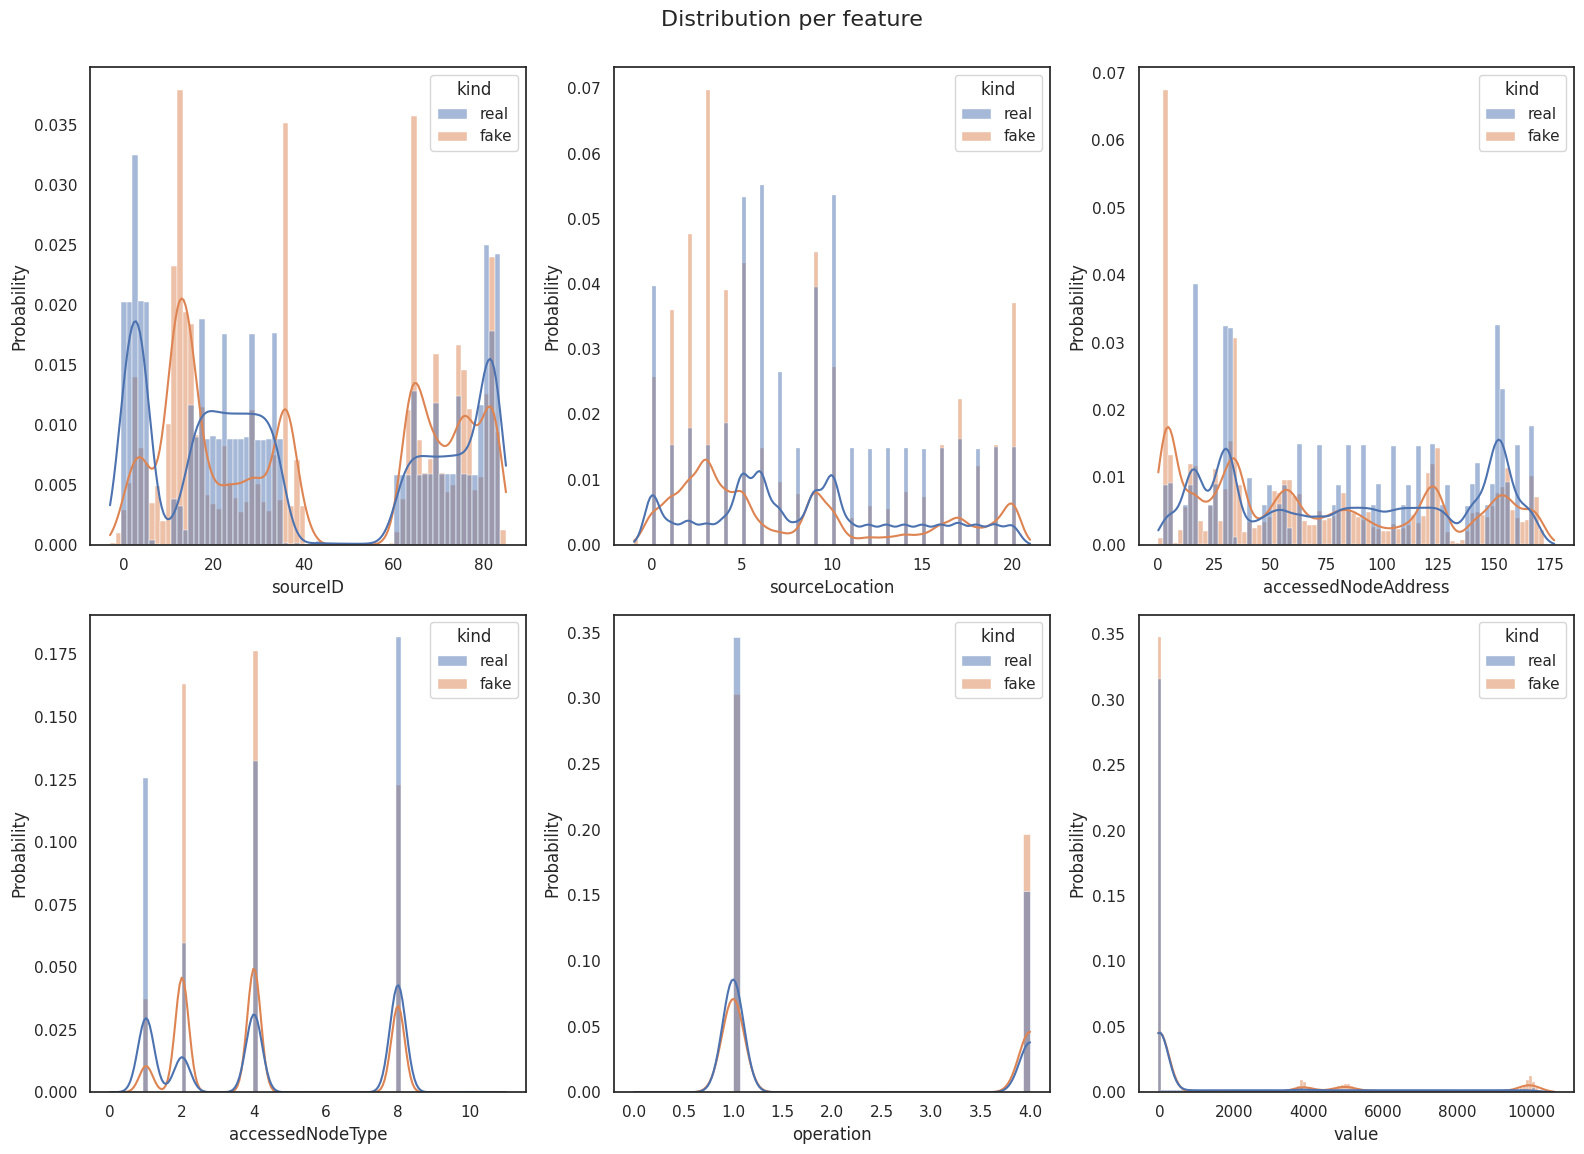

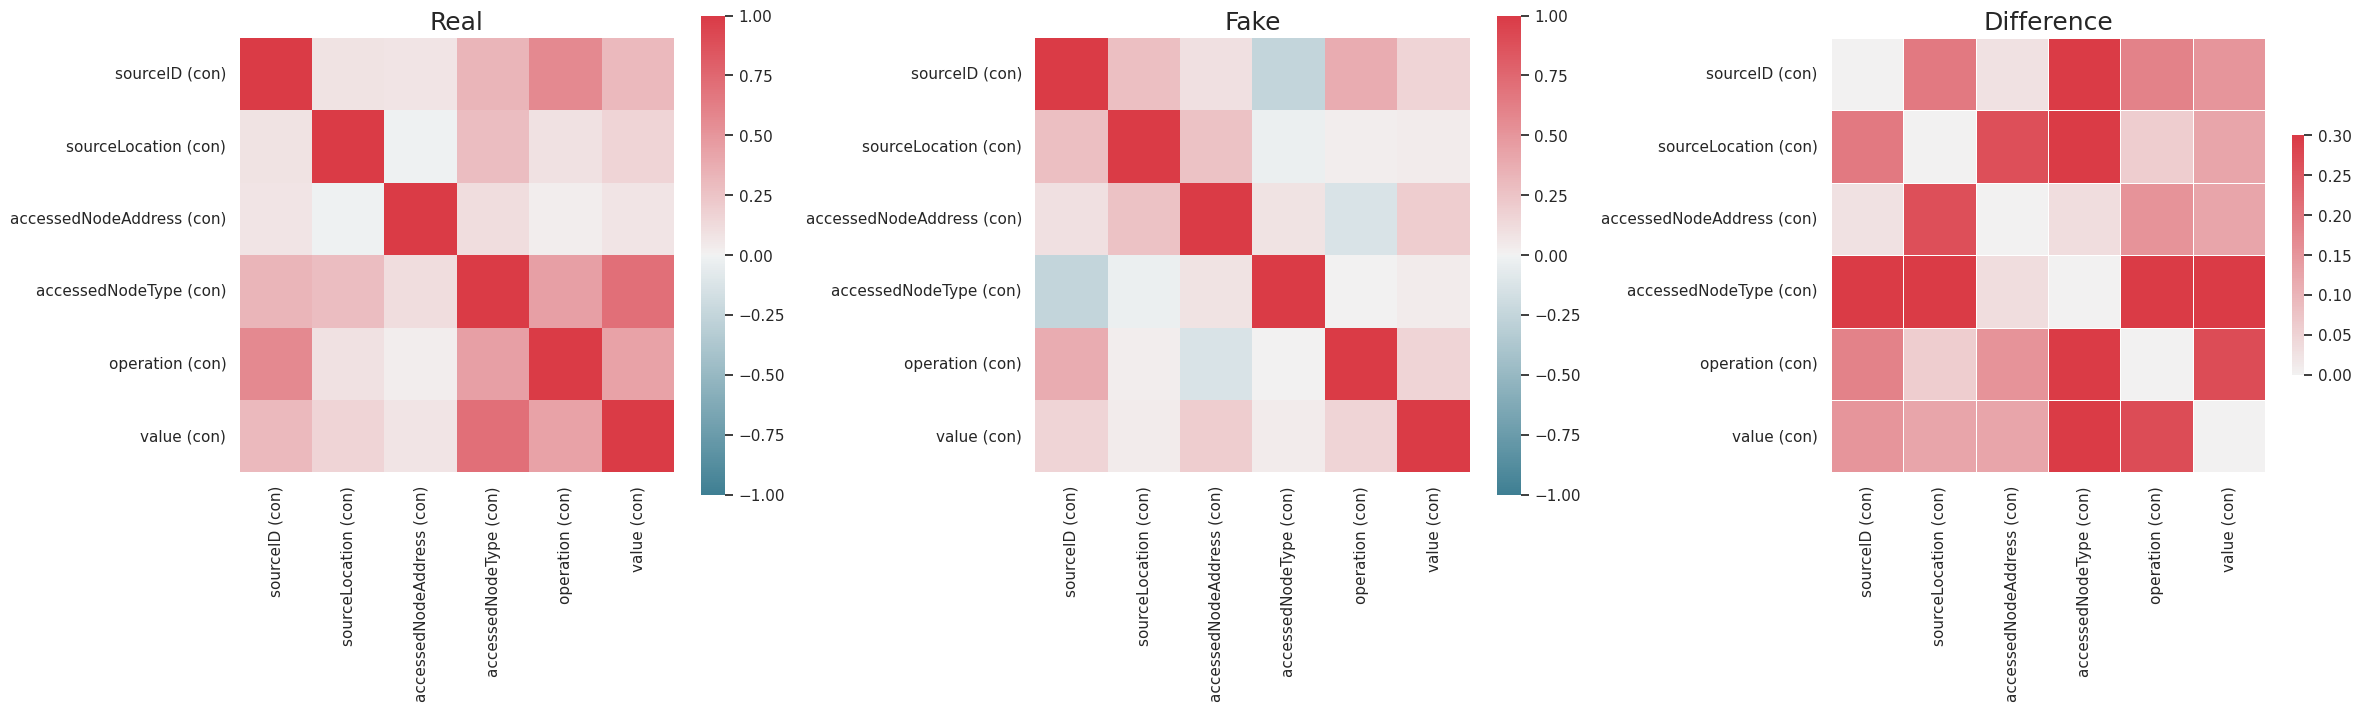

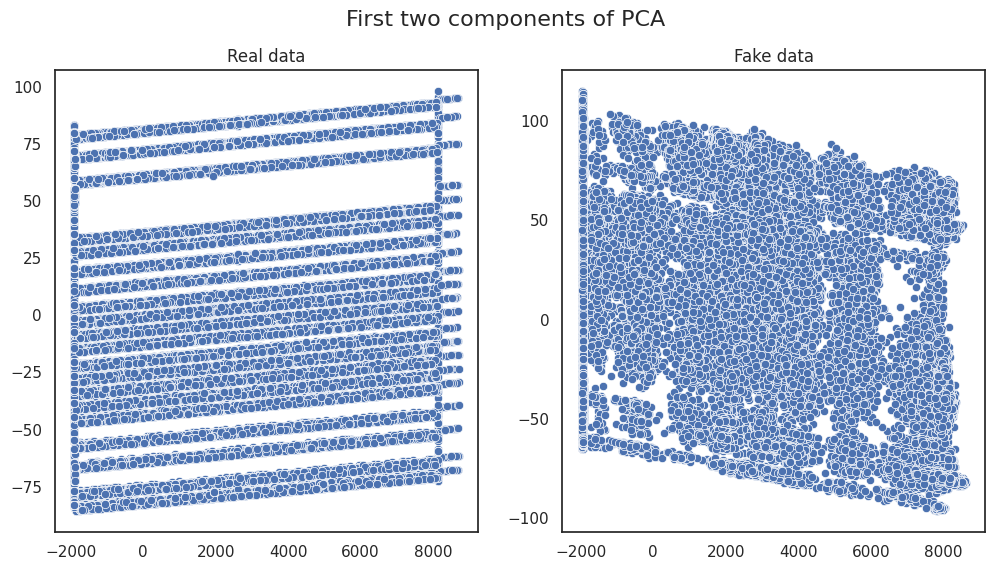

In [ ]:
table_evaluator = TableEvaluator(modified_dataset[['sourceID','sourceLocation','accessedNodeAddress','accessedNodeType','operation','value']], X_ctgan)
table_evaluator.visual_evaluation()

#### Calling algorithms for CTGAN generated data

normality
0    85959
1    58502
2    49738
3    46050
4    45526
5    42478
6    39203
7    32544
Name: count, dtype: int64
**************** Random Forest Classifier ******************
Confusion Matrix 


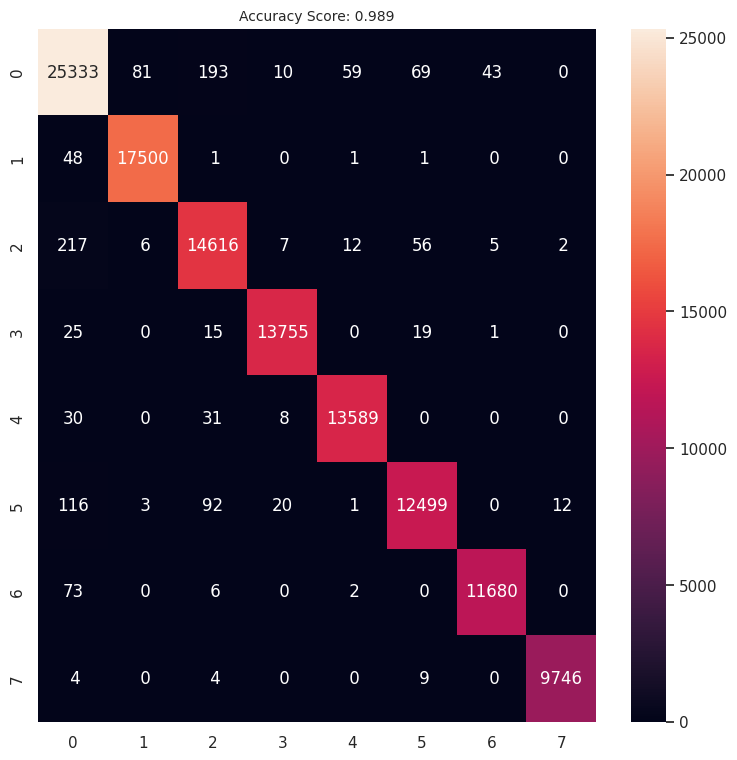

[[25333    81   193    10    59    69    43     0]
 [   48 17500     1     0     1     1     0     0]
 [  217     6 14616     7    12    56     5     2]
 [   25     0    15 13755     0    19     1     0]
 [   30     0    31     8 13589     0     0     0]
 [  116     3    92    20     1 12499     0    12]
 [   73     0     6     0     2     0 11680     0]
 [    4     0     4     0     0     9     0  9746]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     25788
           1       0.99      1.00      1.00     17551
           2       0.98      0.98      0.98     14921
           3       1.00      1.00      1.00     13815
           4       0.99      0.99      0.99     13658
           5       0.99      0.98      0.98     12743
           6       1.00      0.99      0.99     11761
           7       1.00      1.00      1.00      9763

    accuracy                           0.99    120000
   macro avg       0.99      0.99      0.99    12

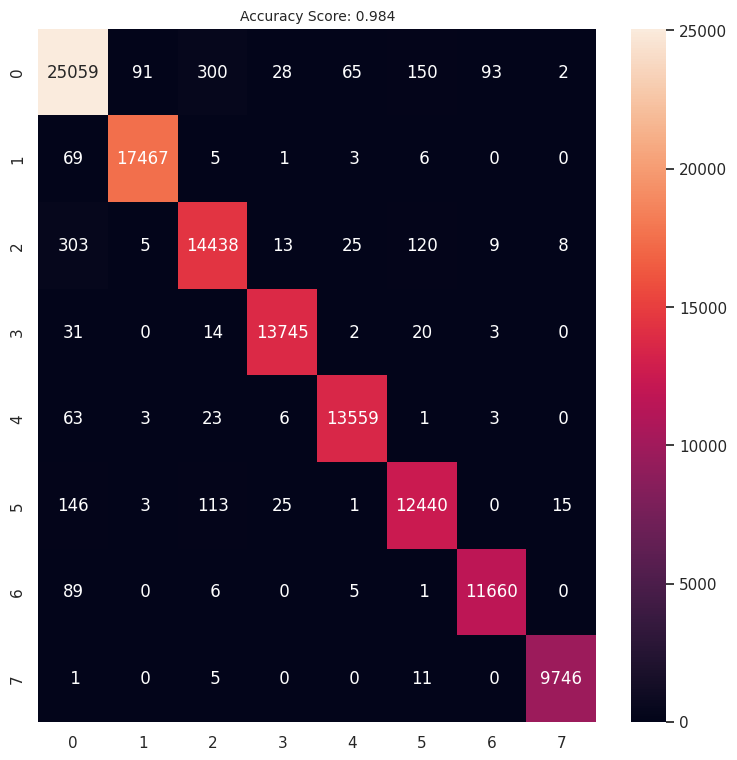

[[25059    91   300    28    65   150    93     2]
 [   69 17467     5     1     3     6     0     0]
 [  303     5 14438    13    25   120     9     8]
 [   31     0    14 13745     2    20     3     0]
 [   63     3    23     6 13559     1     3     0]
 [  146     3   113    25     1 12440     0    15]
 [   89     0     6     0     5     1 11660     0]
 [    1     0     5     0     0    11     0  9746]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     25788
           1       0.99      1.00      0.99     17551
           2       0.97      0.97      0.97     14921
           3       0.99      0.99      0.99     13815
           4       0.99      0.99      0.99     13658
           5       0.98      0.98      0.98     12743
           6       0.99      0.99      0.99     11761
           7       1.00      1.00      1.00      9763

    accuracy                           0.98    120000
   macro avg       0.99      0.99      0.99    12

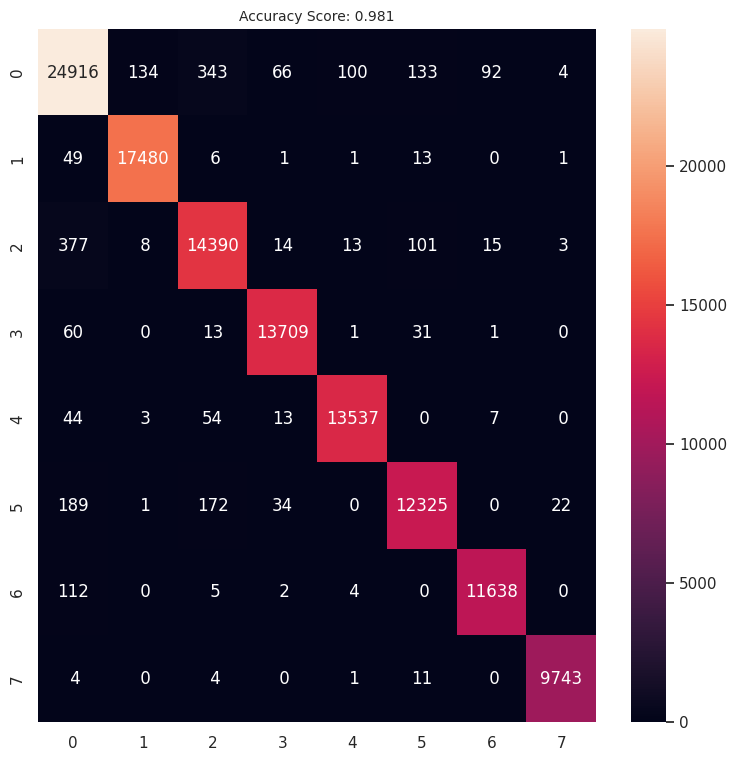

[[24916   134   343    66   100   133    92     4]
 [   49 17480     6     1     1    13     0     1]
 [  377     8 14390    14    13   101    15     3]
 [   60     0    13 13709     1    31     1     0]
 [   44     3    54    13 13537     0     7     0]
 [  189     1   172    34     0 12325     0    22]
 [  112     0     5     2     4     0 11638     0]
 [    4     0     4     0     1    11     0  9743]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     25788
           1       0.99      1.00      0.99     17551
           2       0.96      0.96      0.96     14921
           3       0.99      0.99      0.99     13815
           4       0.99      0.99      0.99     13658
           5       0.98      0.97      0.97     12743
           6       0.99      0.99      0.99     11761
           7       1.00      1.00      1.00      9763

    accuracy                           0.98    120000
   macro avg       0.98      0.98      0.98    12

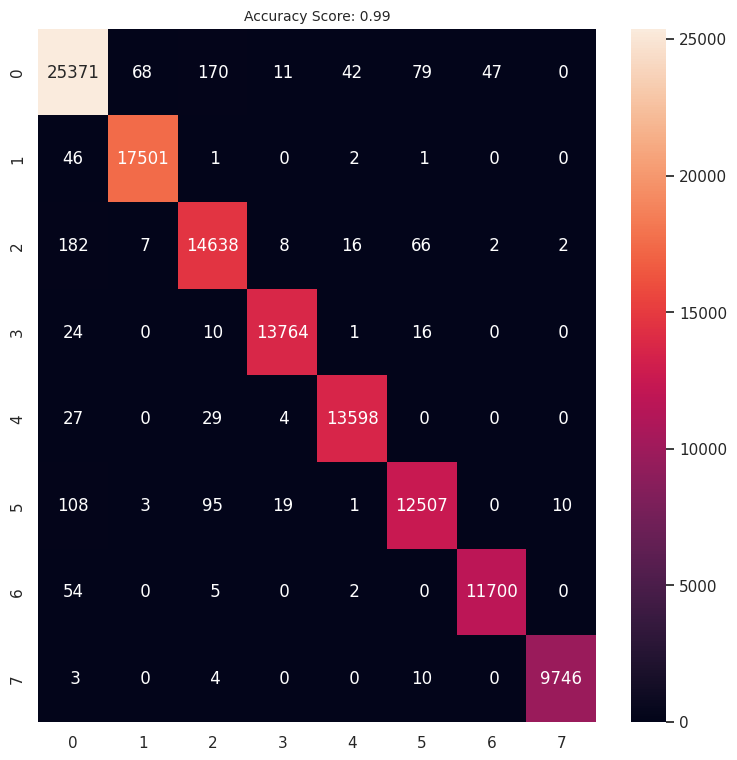

[[25371    68   170    11    42    79    47     0]
 [   46 17501     1     0     2     1     0     0]
 [  182     7 14638     8    16    66     2     2]
 [   24     0    10 13764     1    16     0     0]
 [   27     0    29     4 13598     0     0     0]
 [  108     3    95    19     1 12507     0    10]
 [   54     0     5     0     2     0 11700     0]
 [    3     0     4     0     0    10     0  9746]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     25788
           1       1.00      1.00      1.00     17551
           2       0.98      0.98      0.98     14921
           3       1.00      1.00      1.00     13815
           4       1.00      1.00      1.00     13658
           5       0.99      0.98      0.98     12743
           6       1.00      0.99      1.00     11761
           7       1.00      1.00      1.00      9763

    accuracy                           0.99    120000
   macro avg       0.99      0.99      0.99    12

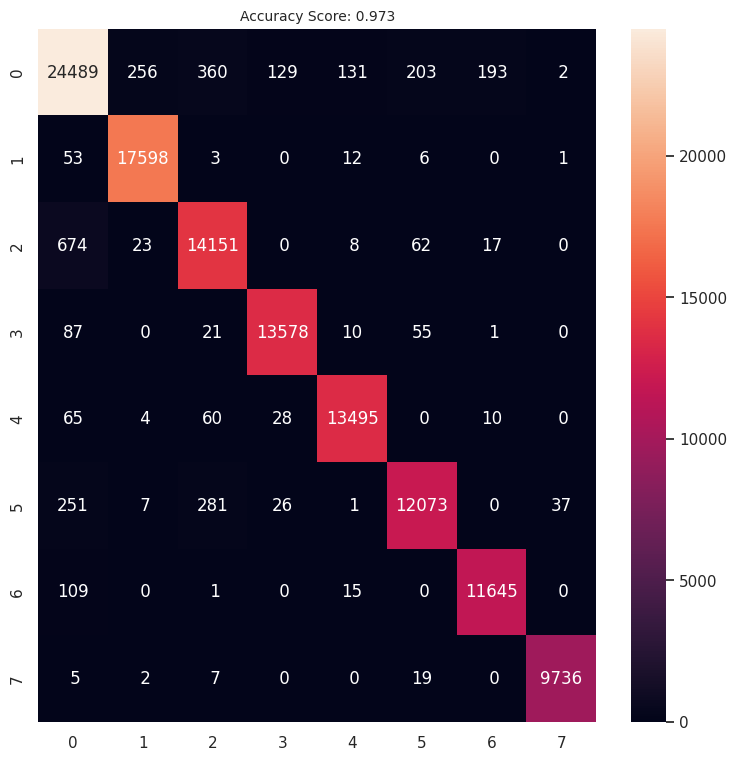

[[24489   256   360   129   131   203   193     2]
 [   53 17598     3     0    12     6     0     1]
 [  674    23 14151     0     8    62    17     0]
 [   87     0    21 13578    10    55     1     0]
 [   65     4    60    28 13495     0    10     0]
 [  251     7   281    26     1 12073     0    37]
 [  109     0     1     0    15     0 11645     0]
 [    5     2     7     0     0    19     0  9736]]
Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     25763
           1       0.98      1.00      0.99     17673
           2       0.95      0.95      0.95     14935
           3       0.99      0.99      0.99     13752
           4       0.99      0.99      0.99     13662
           5       0.97      0.95      0.96     12676
           6       0.98      0.99      0.99     11770
           7       1.00      1.00      1.00      9769

    accuracy                           0.97    120000
   macro av

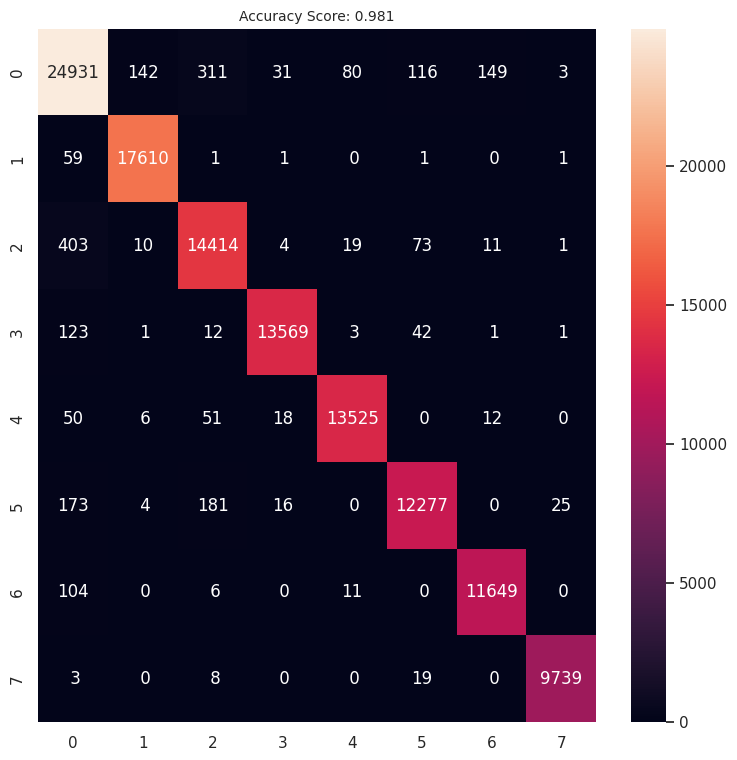

[[24931   142   311    31    80   116   149     3]
 [   59 17610     1     1     0     1     0     1]
 [  403    10 14414     4    19    73    11     1]
 [  123     1    12 13569     3    42     1     1]
 [   50     6    51    18 13525     0    12     0]
 [  173     4   181    16     0 12277     0    25]
 [  104     0     6     0    11     0 11649     0]
 [    3     0     8     0     0    19     0  9739]]
LSTM Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     25763
           1       0.99      1.00      0.99     17673
           2       0.96      0.97      0.96     14935
           3       0.99      0.99      0.99     13752
           4       0.99      0.99      0.99     13662
           5       0.98      0.97      0.97     12676
           6       0.99      0.99      0.99     11770
           7       1.00      1.00      1.00      9769

    accuracy                           0.98    120000
   macro avg       0.

In [ ]:
X_data = X_ctgan.copy()
y_data = y_ctgan.copy()

print(y_data.value_counts())

results_ctgan = call_algorithm(X_data,y_data,'CTGAN',15)

In [ ]:
display(results_ctgan.head(10))

Run Type                 Algorithm  Training Accuracy  Testing Accuracy  \
0    CTGAN  Random Forest Classifier           0.990129          0.989317   
1    CTGAN  Decision Tree Classifier           0.985404          0.984283   
2    CTGAN      MLP - Neural Network           0.982632          0.981150   
3    CTGAN                   XGBoost           0.991318          0.990208   
4    CTGAN            Neural Network           0.973896          0.973042   
5    CTGAN                LSTM - RNN           0.981961          0.980950   

   Recall Score  Precision Score  F1 Score  
0      0.990230         0.990705  0.990465  
1      0.986019         0.985878  0.985949  
2      0.983089         0.983189  0.983134  
3      0.991060         0.991334  0.991196  
4      0.975921         0.976168  0.976025  
5      0.982637         0.983266  0.982943

In [ ]:
modified_dataset.to_csv('/content/drive/My Drive/Colab Notebooks/modified_dataset.csv')
results_smote.to_csv('/content/drive/My Drive/Colab Notebooks/results_smote.csv')
results_rus.to_csv('/content/drive/My Drive/Colab Notebooks/results_rus.csv')
results_ctgan.to_csv('/content/drive/My Drive/Colab Notebooks/results_ctgan.csv')

In [ ]:
results_final = pd.concat([results_smote,results_rus,results_ctgan])

In [ ]:
display(results_final)
results_final.to_csv('/content/drive/My Drive/Colab Notebooks/results_final.csv')

Run Type                 Algorithm  Training Accuracy  \
0                 SMOTE  Random Forest Classifier             0.9992   
1                 SMOTE  Decision Tree Classifier             0.9992   
2                 SMOTE      MLP - Neural Network             0.9985   
3                 SMOTE                   XGBoost             0.9992   
4                 SMOTE            Neural Network             0.9984   
5                 SMOTE                LSTM - RNN             0.9985   
0  Random Undersampling  Random Forest Classifier             0.9927   
1  Random Undersampling  Decision Tree Classifier             0.9854   
2  Random Undersampling      MLP - Neural Network             0.9208   
3  Random Undersampling                   XGBoost             0.9941   
4  Random Undersampling            Neural Network             0.9209   
5  Random Undersampling                LSTM - RNN             0.6940   
0                 CTGAN  Random Forest Classifier             0.9901   
1                 CTGAN  Decision Tree Classifier             0.9854   
2                 CTGAN      MLP - Neural Network             0.9826   
3                 CTGAN                   XGBoost             0.9913   
4                 CTGAN            Neural Network             0.9739   
5                 CTGAN                LSTM - RNN             0.9820   

   Testing Accuracy  Recall Score  Precision Score  F1 Score  
0            0.9992        0.9992           0.9992    0.9992  
1            0.9992        0.9992           0.9992    0.9992  
2            0.9985        0.9985           0.9985    0.9985  
3            0.9992        0.9992           0.9992    0.9992  
4            0.9983        0.9983           0.9984    0.9983  
5            0.9985        0.9984           0.9985    0.9985  
0            0.9659        0.9653           0.9654    0.9648  
1            0.9659        0.9653           0.9659    0.9637  
2            0.8908        0.8891           0.8932    0.8824  
3            0.9488        0.9479           0.9474    0.9466  
4            0.9181        0.9124           0.9177    0.9097  
5            0.7235        0.7047           0.7879    0.6761  
0            0.9893        0.9902           0.9907    0.9905  
1            0.9843        0.9860           0.9859    0.9859  
2            0.9811        0.9831           0.9832    0.9831  
3            0.9902        0.9911           0.9913    0.9912  
4            0.9730        0.9759           0.9762    0.9760  
5            0.9809        0.9826           0.9833    0.9829

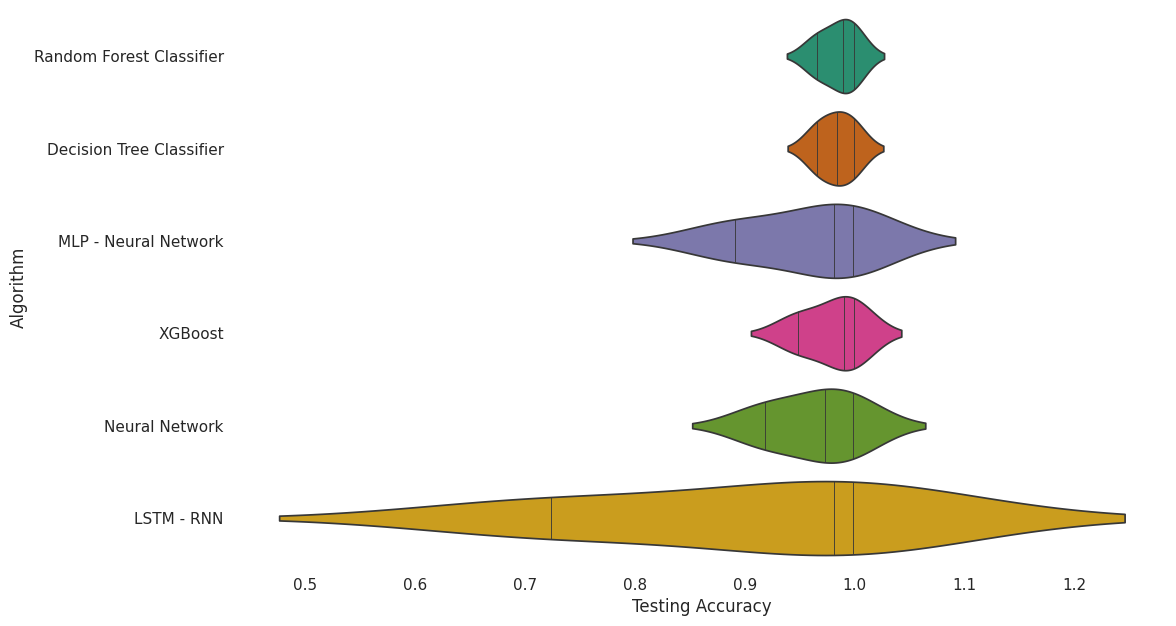

In [ ]:
# @title Algorithm vs Testing Accuracy

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results_final['Algorithm'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results_final, x='Testing Accuracy', y='Algorithm', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

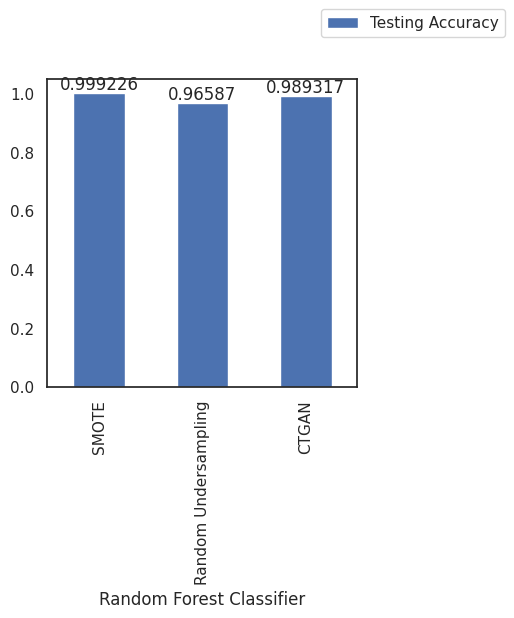

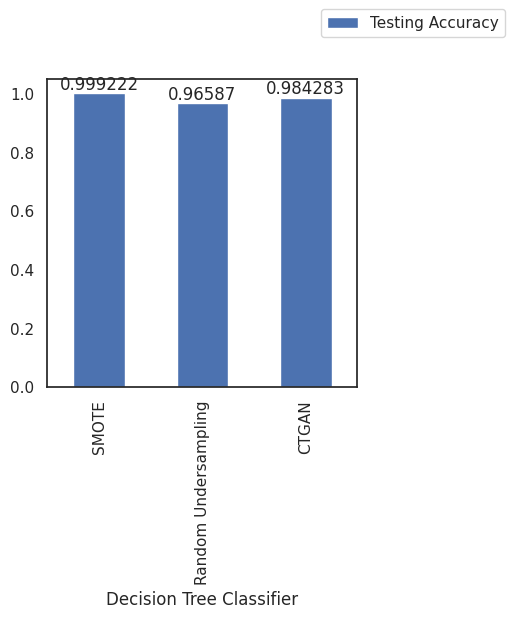

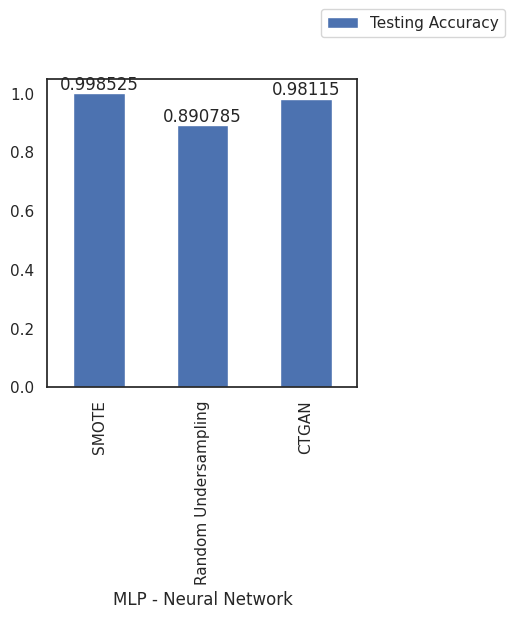

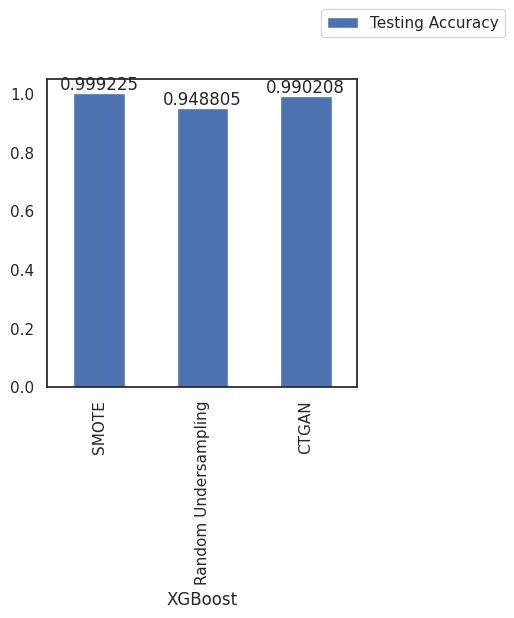

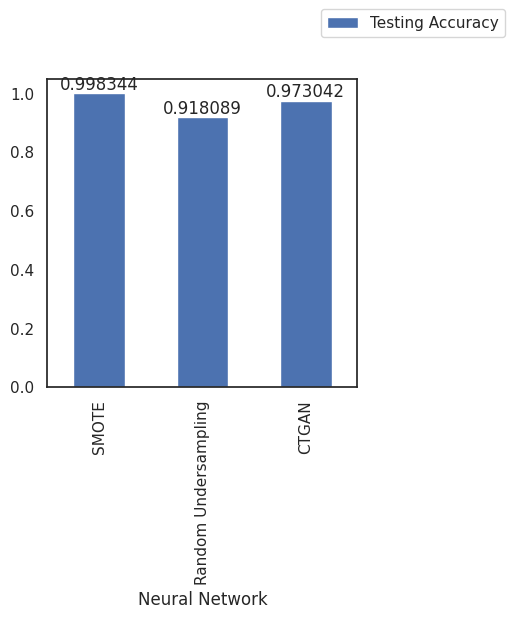

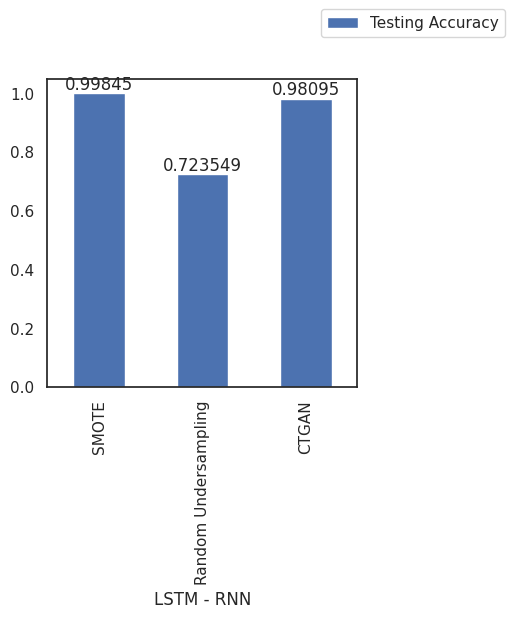

In [ ]:
df = results_final[['Testing Accuracy','Algorithm','Run Type']]

df = df.set_index('Run Type')

for i in df['Algorithm'].unique():
    ax = df[df['Algorithm']==i]['Testing Accuracy'].plot(kind='bar', figsize=(4,4))
    ax.legend(bbox_to_anchor=(1.5, 1.25))
    ax.set_xlabel(i)
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()

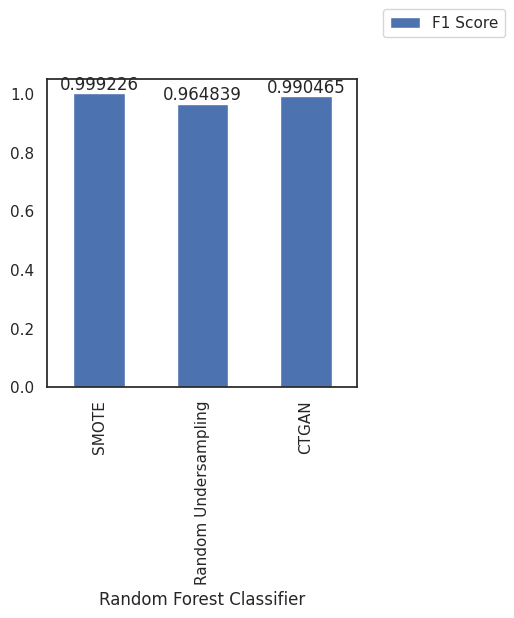

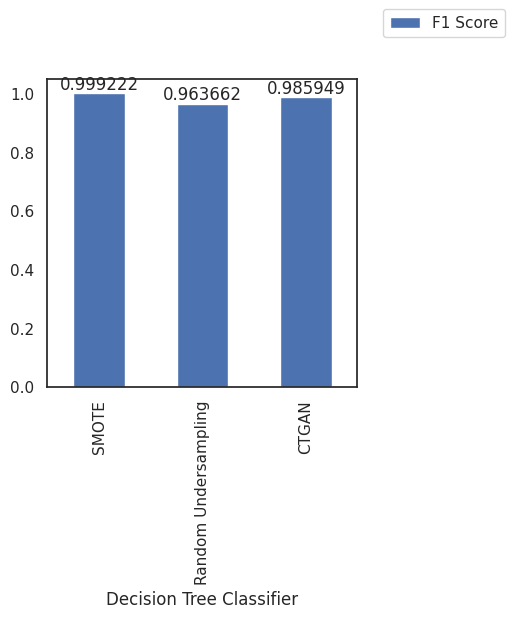

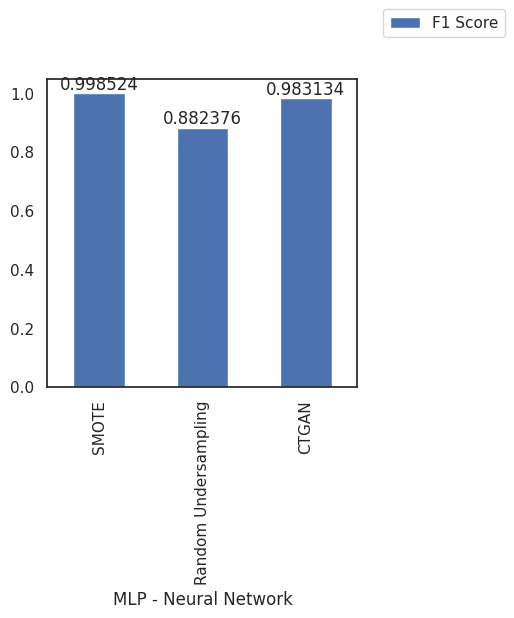

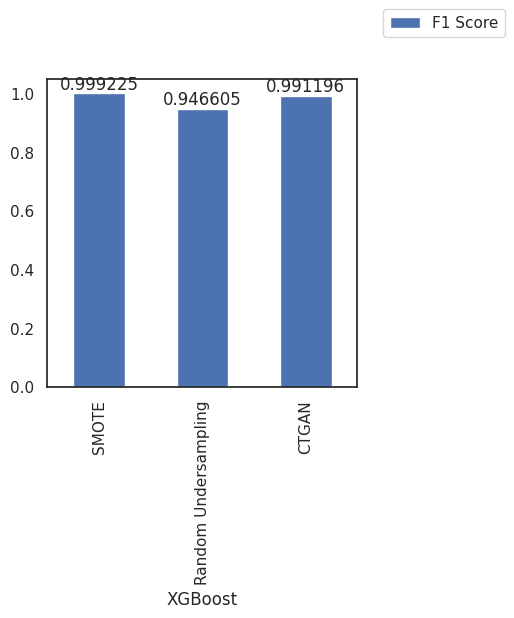

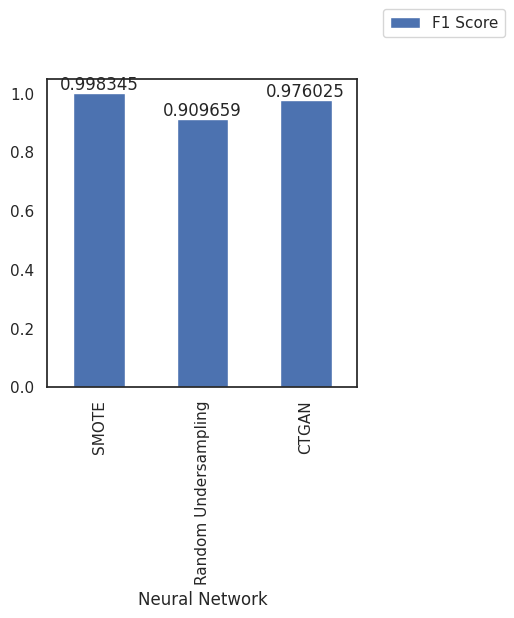

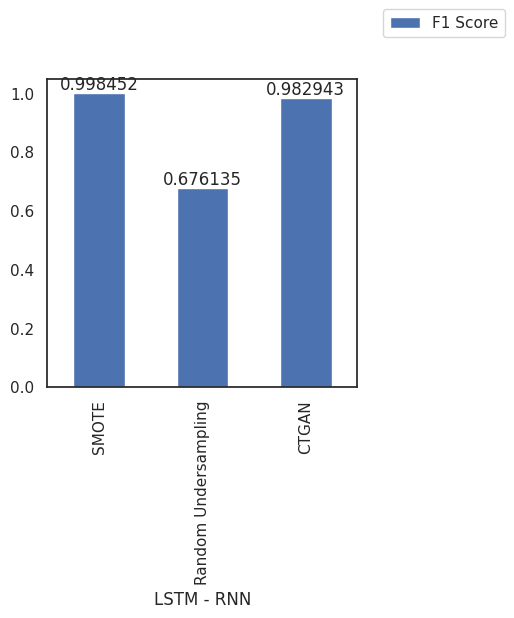

In [ ]:
df = results_final[['F1 Score','Algorithm','Run Type']]

df = df.set_index('Run Type')

for i in df['Algorithm'].unique():
    ax = df[df['Algorithm']==i]['F1 Score'].plot(kind='bar', figsize=(4,4))
    ax.legend(bbox_to_anchor=(1.5, 1.25))
    ax.set_xlabel(i)
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()

### Feature importance

In [ ]:
def feature_importance(X_data,y_data):

  X_train, X_test, y_train, y_test = train_test_split(X_data, y_data , test_size= 0.3,random_state=rand_state,stratify=y_data)

  scaler=StandardScaler() # Scaling data
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)

  dTree = DecisionTreeClassifier(criterion = 'gini', random_state=rand_state,max_depth=100)
  dTree.fit(X_train, y_train)
  y_predict = dTree.predict(X_test)
  print('Decision Tree after pruning')
  print("Training accuracy - ",dTree.score(X_train,y_train))
  print("Testing accuracy - ",dTree.score(X_test, y_test))

  importance = dTree.feature_importances_
  indices = np.argsort(importance)[::-1]
  features = X_data.columns

  # Print the feature ranking
  print("Feature ranking:")

  for f in range(X_data.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]], importance[indices[f]]))

  # Creating a bar chart for Features
  plt.figure()
  plt.title("Feature importance - With default values for Decision Tree")
  plt.bar(range(X_data.shape[1]), importance[indices],color="g", align="center")
  plt.xticks(range(X_data.shape[1]), features[indices], rotation=90)
  plt.xlim([-1, X_data.shape[1]])
  plt.tight_layout()
  plt.show()

Decision Tree after pruning
Training accuracy -  0.9991608654325829
Testing accuracy -  0.9992251905288823
Feature ranking:
1. sourceID (0.343387)
2. value (0.198034)
3. accessedNodeType (0.166208)
4. accessedNodeAddress (0.138353)
5. operation (0.113002)
6. sourceLocation (0.041017)


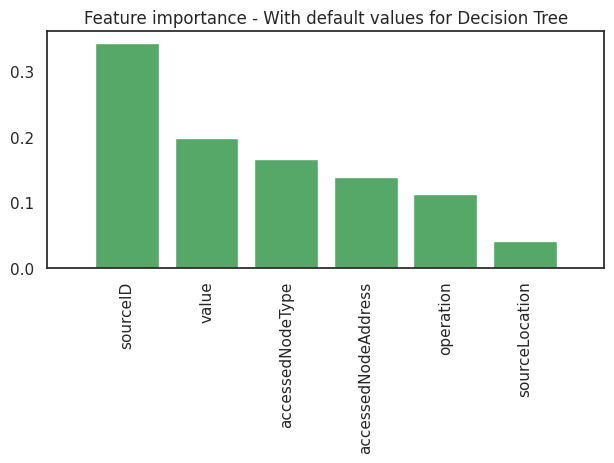

In [ ]:
feature_importance(X_smote,Y_smote)

Decision Tree after pruning
Training accuracy -  1.0
Testing accuracy -  0.9897610921501706
Feature ranking:
1. sourceID (0.322153)
2. value (0.210742)
3. accessedNodeType (0.180689)
4. accessedNodeAddress (0.167704)
5. operation (0.091712)
6. sourceLocation (0.027000)


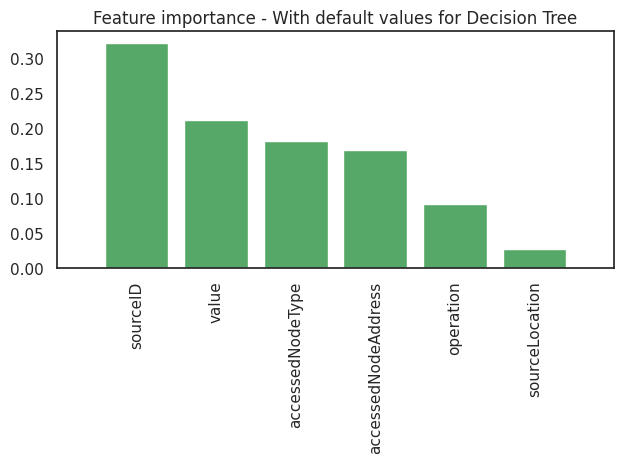

In [ ]:
feature_importance(X_rus,y_rus)

Decision Tree after pruning
Training accuracy -  0.9992107142857143
Testing accuracy -  0.9860083333333334
Feature ranking:
1. sourceID (0.280973)
2. accessedNodeType (0.223303)
3. accessedNodeAddress (0.159103)
4. sourceLocation (0.126228)
5. value (0.117745)
6. operation (0.092647)


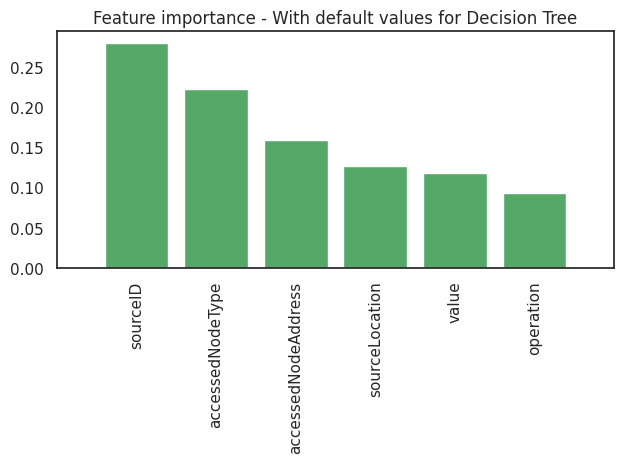

In [ ]:
feature_importance(X_ctgan,y_ctgan)